# Summary assignment - Predicting chronic kidney disease (CKD) using machine learning

<div align="justify">  Chronic Kidney Disease (CKD) is a common medical condition with serious implications. However, doctors face difficulty in predicting the onset of CKD.<br>
<strong> The aim of the work </strong> is to develop a machine learning model that can accurately predict CKD based on electronic medical record data.<br>
<strong> The work will include; </strong> data preparation, selection Characteristics, treatment of class imbalance, model training, evaluation, interpretation and application of Al interpretation techniques and subgroup analysis. <br>
<strong> The database; </strong> is based on electronic medical record data of patients admitted to the hospital. It includes demographic characteristics of the patient, blood and urine test data and disease data. The target variable is the existence/absence of EventCKD35 </div>

### variables in the database

![SNOWFALL](database.jpg) 

<div align="justify"> 
Explanation regarding Time To Event-TTE (months) <br>
The data in this database was collected regarding inpatients who were hospitalized in a hospital in 2008. These patients were followed up until 2017 at the latesttime to event data (TTE) refers to the time (in months) until the onset of a CKD event or the last visit, whichever is earlier.<br>
This means that for those hospitalized with EventCKD35=1, time to the event refers to the number of new patients who passed from the day of hospitalization (in 2008) until the event occurred.
For patients with EventCKD35=0 time to event refers to the number of months that have passed from the day of hospitalization to the last follow-up visit (before 2017)
</div>

### An article on this subject:

<div align="justify"> Rajib Kumar Halder, Mohammed Nasir Uddin, Md. Ashraf Uddin, Sunil Aryal, Sajeeb Saha, Rakib Hossen, Sabbir Ahmed, Mohammad Abu Tareq Rony, Mosammat Farida Akter, <strong> ML-CKDP: Machine learning-based chronic kidney disease prediction with smart web application</strong>, Journal of Pathology Informatics 15 (2024) 100371 </div>

![SNOWFALL](Kidney.jpg)

## 1. Data Exploration and Preprocessing

In [1]:
import pandas as pd
dataframe = pd.read_excel('C:/Users/YaelD/Desktop/CKD dataset.xlsx')

In [2]:
dataframe.head()

StudyID  Gender  AgeBaseline  Age.3.categories  HistoryDiabetes  \
0        1       0           64                 1                0   
1        2       0           52                 1                0   
2        3       0           56                 1                0   
3        4       0           58                 1                0   
4        5       0           63                 1                1   

   HistoryCHD  HistoryVascular  HistorySmoking  HistoryHTN   HistoryDLD  ...  \
0           0                0               0            1           1  ...   
1           0                0               0            1           1  ...   
2           0                0               0            1           1  ...   
3           0                0               0            0           1  ...   
4           0                0               0            1           1  ...   

   CholesterolBaseline  TriglyceridesBaseline  HgbA1C  CreatnineBaseline  \
0                  4.8                   0.92    5.90               59.0   
1                  6.4                   1.84    6.00               52.0   
2                  6.4                   1.75    5.90               57.0   
3                  5.1                   1.22    5.50               65.0   
4                  5.0                   1.11    7.46               70.0   

   eGFRBaseline  sBPBaseline  dBPBaseline  BMIBaseline  TimeToEventMonths  \
0     93.319050          144           87    40.161842                 98   
1    105.833836          148           91    44.536941                106   
2     99.839823          149           86    40.543437                 88   
3     90.315159          116           68    32.025584                103   
4     79.725199          132           63    30.757401                105   

   EventCKD35  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 25 columns]

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   StudyID                491 non-null    int64  
 1   Gender                 491 non-null    int64  
 2   AgeBaseline            491 non-null    int64  
 3   Age.3.categories       491 non-null    int64  
 4   HistoryDiabetes        491 non-null    int64  
 5   HistoryCHD             491 non-null    int64  
 6   HistoryVascular        491 non-null    int64  
 7   HistorySmoking         491 non-null    int64  
 8   HistoryHTN             491 non-null    int64  
 9   HistoryDLD             491 non-null    int64  
 10  HistoryObesity         491 non-null    int64  
 11  DLDmeds                491 non-null    int64  
 12  DMmeds                 491 non-null    int64  
 13  HTNmeds                491 non-null    int64  
 14  ACEIARB                491 non-null    int64  
 15  Choles

<li value="1"> It seems that the TriglyceridesBaseline and HgbA1C positions have missing values.</li>
&emsp; For these columns we will fill in the most common value, <br>
&emsp; since we are starting from the assumption that the information may contain outliers and because an average is affected by outliers we will not use the average.

In [4]:
# Checking for missing values in 'TriglyceridesBaseline' and 'HgbA1C'
missing_values = dataframe[['TriglyceridesBaseline', 'HgbA1C']].isnull().sum()

# Calculating the most common value for 'TriglyceridesBaseline' and 'HgbA1C'
mode_triglycerides = dataframe['TriglyceridesBaseline'].mode()[0]
mode_hgba1c = dataframe['HgbA1C'].mode()[0]

# Filling the missing values with the most common value
dataframe['TriglyceridesBaseline'].fillna(mode_triglycerides, inplace=True)
dataframe['HgbA1C'].fillna(mode_hgba1c, inplace=True)

# Verifying if there are any missing values left in 'TriglyceridesBaseline' and 'HgbA1C'
missing_values_after = dataframe[['TriglyceridesBaseline', 'HgbA1C']].isnull().sum()

print(missing_values, mode_triglycerides, mode_hgba1c, missing_values_after)

TriglyceridesBaseline     6
HgbA1C                   15
dtype: int64 0.6 6.0 TriglyceridesBaseline    0
HgbA1C                   0
dtype: int64


<li value="1"> We will perform coding for categorical variables with a One hot encoder. </li>
<li value="1"> We will scale numerical variables with a Robust scaler. </li>
&emsp; Standardization of a dataset is a common preprocessing for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. <br>
&emsp; However, outliers can often influence the sample mean / variance in a negative way. In such cases, using the median and the interquartile range often give better results.<br>
&emsp; And since this information may have values which may be outliers such as abnormal tests, we prefer to use this scalar.

In [5]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder

# Rename the column 'HistoryHTN ' to 'HistoryHTN' (unnecessary space)
dataframe.rename(columns={'HistoryHTN ': 'HistoryHTN'}, inplace=True)

# Move the 'EventCKD35' column to the end of the DataFrame
target_column = 'EventCKD35'
columns = [col for col in dataframe.columns if col != target_column] + [target_column]
df = dataframe[columns]

# Identify categorical and numerical columns
binary_columns = ['HistoryDiabetes', 'HistoryCHD', 'HistoryVascular', 'HistorySmoking', 'HistoryHTN', 
                  'HistoryDLD', 'HistoryObesity', 'DLDmeds', 'DMmeds', 'HTNmeds', 'ACEIARB', 'Gender']
categorical_columns = ['Age.3.categories']
numerical_columns = ['AgeBaseline', 'CholesterolBaseline', 'TriglyceridesBaseline', 'HgbA1C', 'CreatnineBaseline', 
                     'eGFRBaseline', 'sBPBaseline', 'dBPBaseline', 'BMIBaseline', 'TimeToEventMonths']

# One-Hot Encode non-binary categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_categorical = encoder.fit_transform(df[categorical_columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Standardize numerical variables
scaler = RobustScaler()
standardized_numerical = scaler.fit_transform(df[numerical_columns])
standardized_numerical_df = pd.DataFrame(standardized_numerical, columns=numerical_columns)

# Combine encoded categorical, binary, and standardized numerical data with the target column
processed_df = pd.concat([df[['StudyID'] + binary_columns], encoded_categorical_df, standardized_numerical_df, df[[target_column]]], axis=1)

# Set the index to StudyID
processed_df= processed_df.set_index('StudyID')

C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
processed_df.tail()

HistoryDiabetes  HistoryCHD  HistoryVascular  HistorySmoking  \
StudyID                                                                 
959                    0           0                0               0   
962                    0           0                0               0   
965                    1           0                0               0   
967                    0           0                1               1   
968                    0           0                0               0   

         HistoryHTN  HistoryDLD  HistoryObesity  DLDmeds  DMmeds  HTNmeds  \
StudyID                                                                     
959               0           0               0        0       0        0   
962               1           0               1        0       0        0   
965               0           1               1        1       1        0   
967               1           1               0        1       0        1   
968               0           0               0        0       0        0   

         ...  CholesterolBaseline  TriglyceridesBaseline    HgbA1C  \
StudyID  ...                                                         
959      ...             0.191083              -0.603550 -0.083333   
962      ...             0.573248               0.260355  0.000000   
965      ...             0.898089               0.189349  4.333333   
967      ...            -0.636943               0.023550 -0.083333   
968      ...            -1.764331              -0.532544 -1.500000   

         CreatnineBaseline  eGFRBaseline  sBPBaseline  dBPBaseline  \
StudyID                                                              
959               0.297872      1.064616        -0.20    -0.214286   
962               0.042553      0.532986         0.95     2.500000   
965               0.012766      0.587624        -0.25     0.428571   
967               1.148936     -0.454419        -0.60    -0.785714   
968              -0.042553      1.364007        -0.50    -1.571429   

         BMIBaseline  TimeToEventMonths  EventCKD35  
StudyID                                              
959        -0.764359           0.391304           0  
962         0.498543           0.043478           0  
965         0.779272          -4.043478           0  
967        -1.042447          -2.521739           1  
968        -1.154588           0.565217           0  

[5 rows x 26 columns]

In [7]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 1 to 968
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HistoryDiabetes        491 non-null    int64  
 1   HistoryCHD             491 non-null    int64  
 2   HistoryVascular        491 non-null    int64  
 3   HistorySmoking         491 non-null    int64  
 4   HistoryHTN             491 non-null    int64  
 5   HistoryDLD             491 non-null    int64  
 6   HistoryObesity         491 non-null    int64  
 7   DLDmeds                491 non-null    int64  
 8   DMmeds                 491 non-null    int64  
 9   HTNmeds                491 non-null    int64  
 10  ACEIARB                491 non-null    int64  
 11  Gender                 491 non-null    int64  
 12  Age.3.categories_0     491 non-null    float64
 13  Age.3.categories_1     491 non-null    float64
 14  Age.3.categories_2     491 non-null    float64
 15  AgeBas

<li value="1"> Exploratory exploration of the processed_df. </li>


Summary statistics:
       HistoryDiabetes  HistoryCHD  HistoryVascular  HistorySmoking  \
count       491.000000  491.000000       491.000000      491.000000   
mean          0.437882    0.091650         0.059063        0.152749   
std           0.496632    0.288825         0.235983        0.360113   
min           0.000000    0.000000         0.000000        0.000000   
25%           0.000000    0.000000         0.000000        0.000000   
50%           0.000000    0.000000         0.000000        0.000000   
75%           1.000000    0.000000         0.000000        0.000000   
max           1.000000    1.000000         1.000000        1.000000   

       HistoryHTN  HistoryDLD  HistoryObesity     DLDmeds      DMmeds  \
count  491.000000  491.000000      491.000000  491.000000  491.000000   
mean     0.682281    0.645621        0.505092    0.551935    0.327902   
std      0.466064    0.478812        0.500484    0.497803    0.469928   
min      0.000000    0.000000        0.000000  

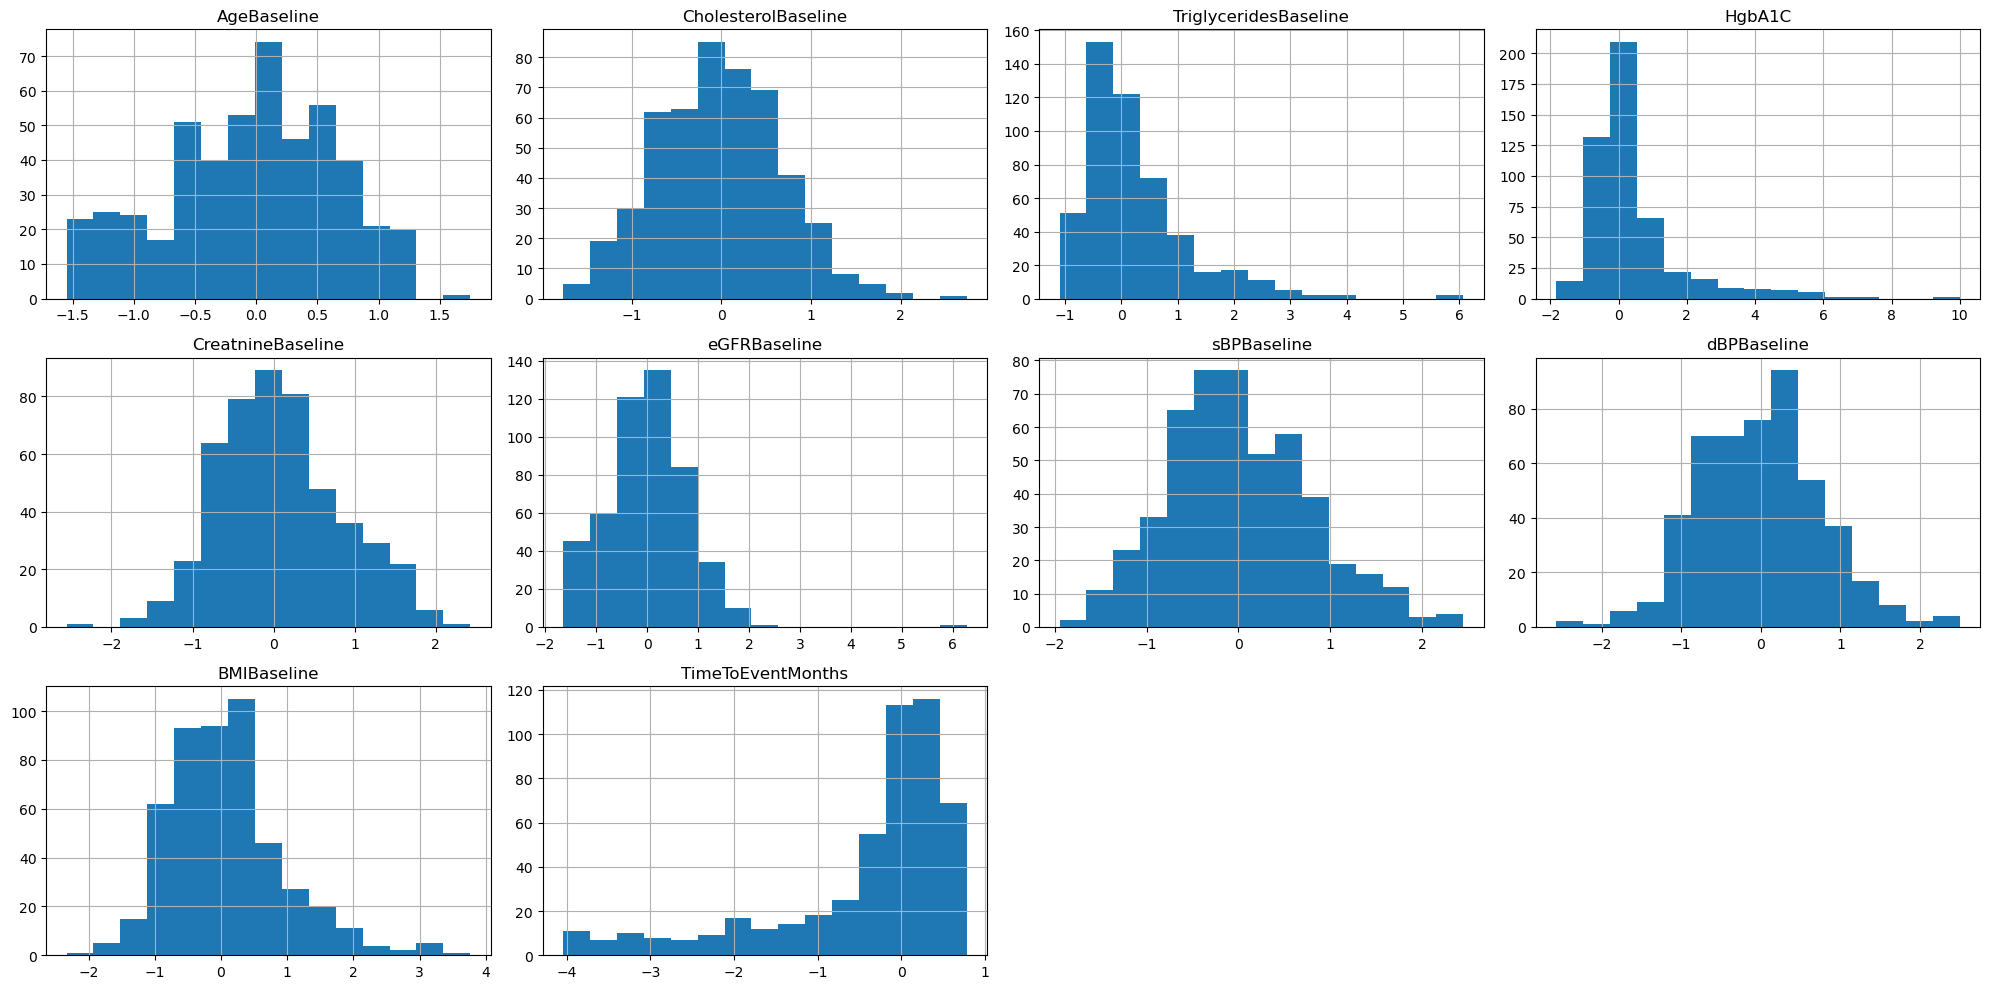


Correlation matrix:


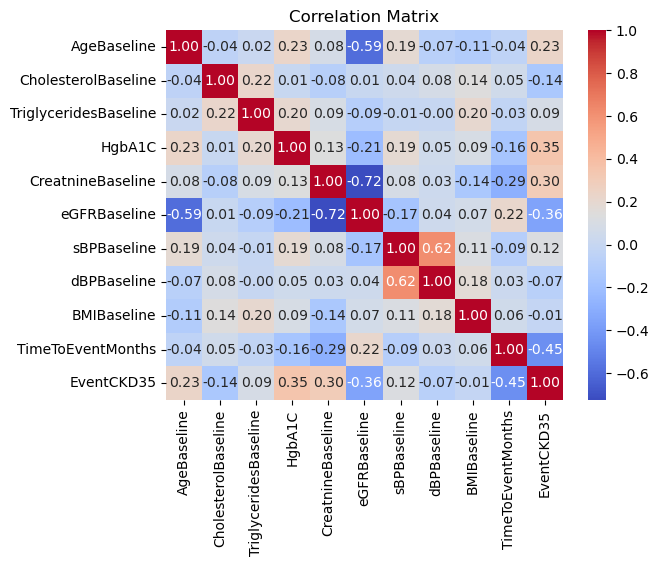


Bar plots of categorical features:


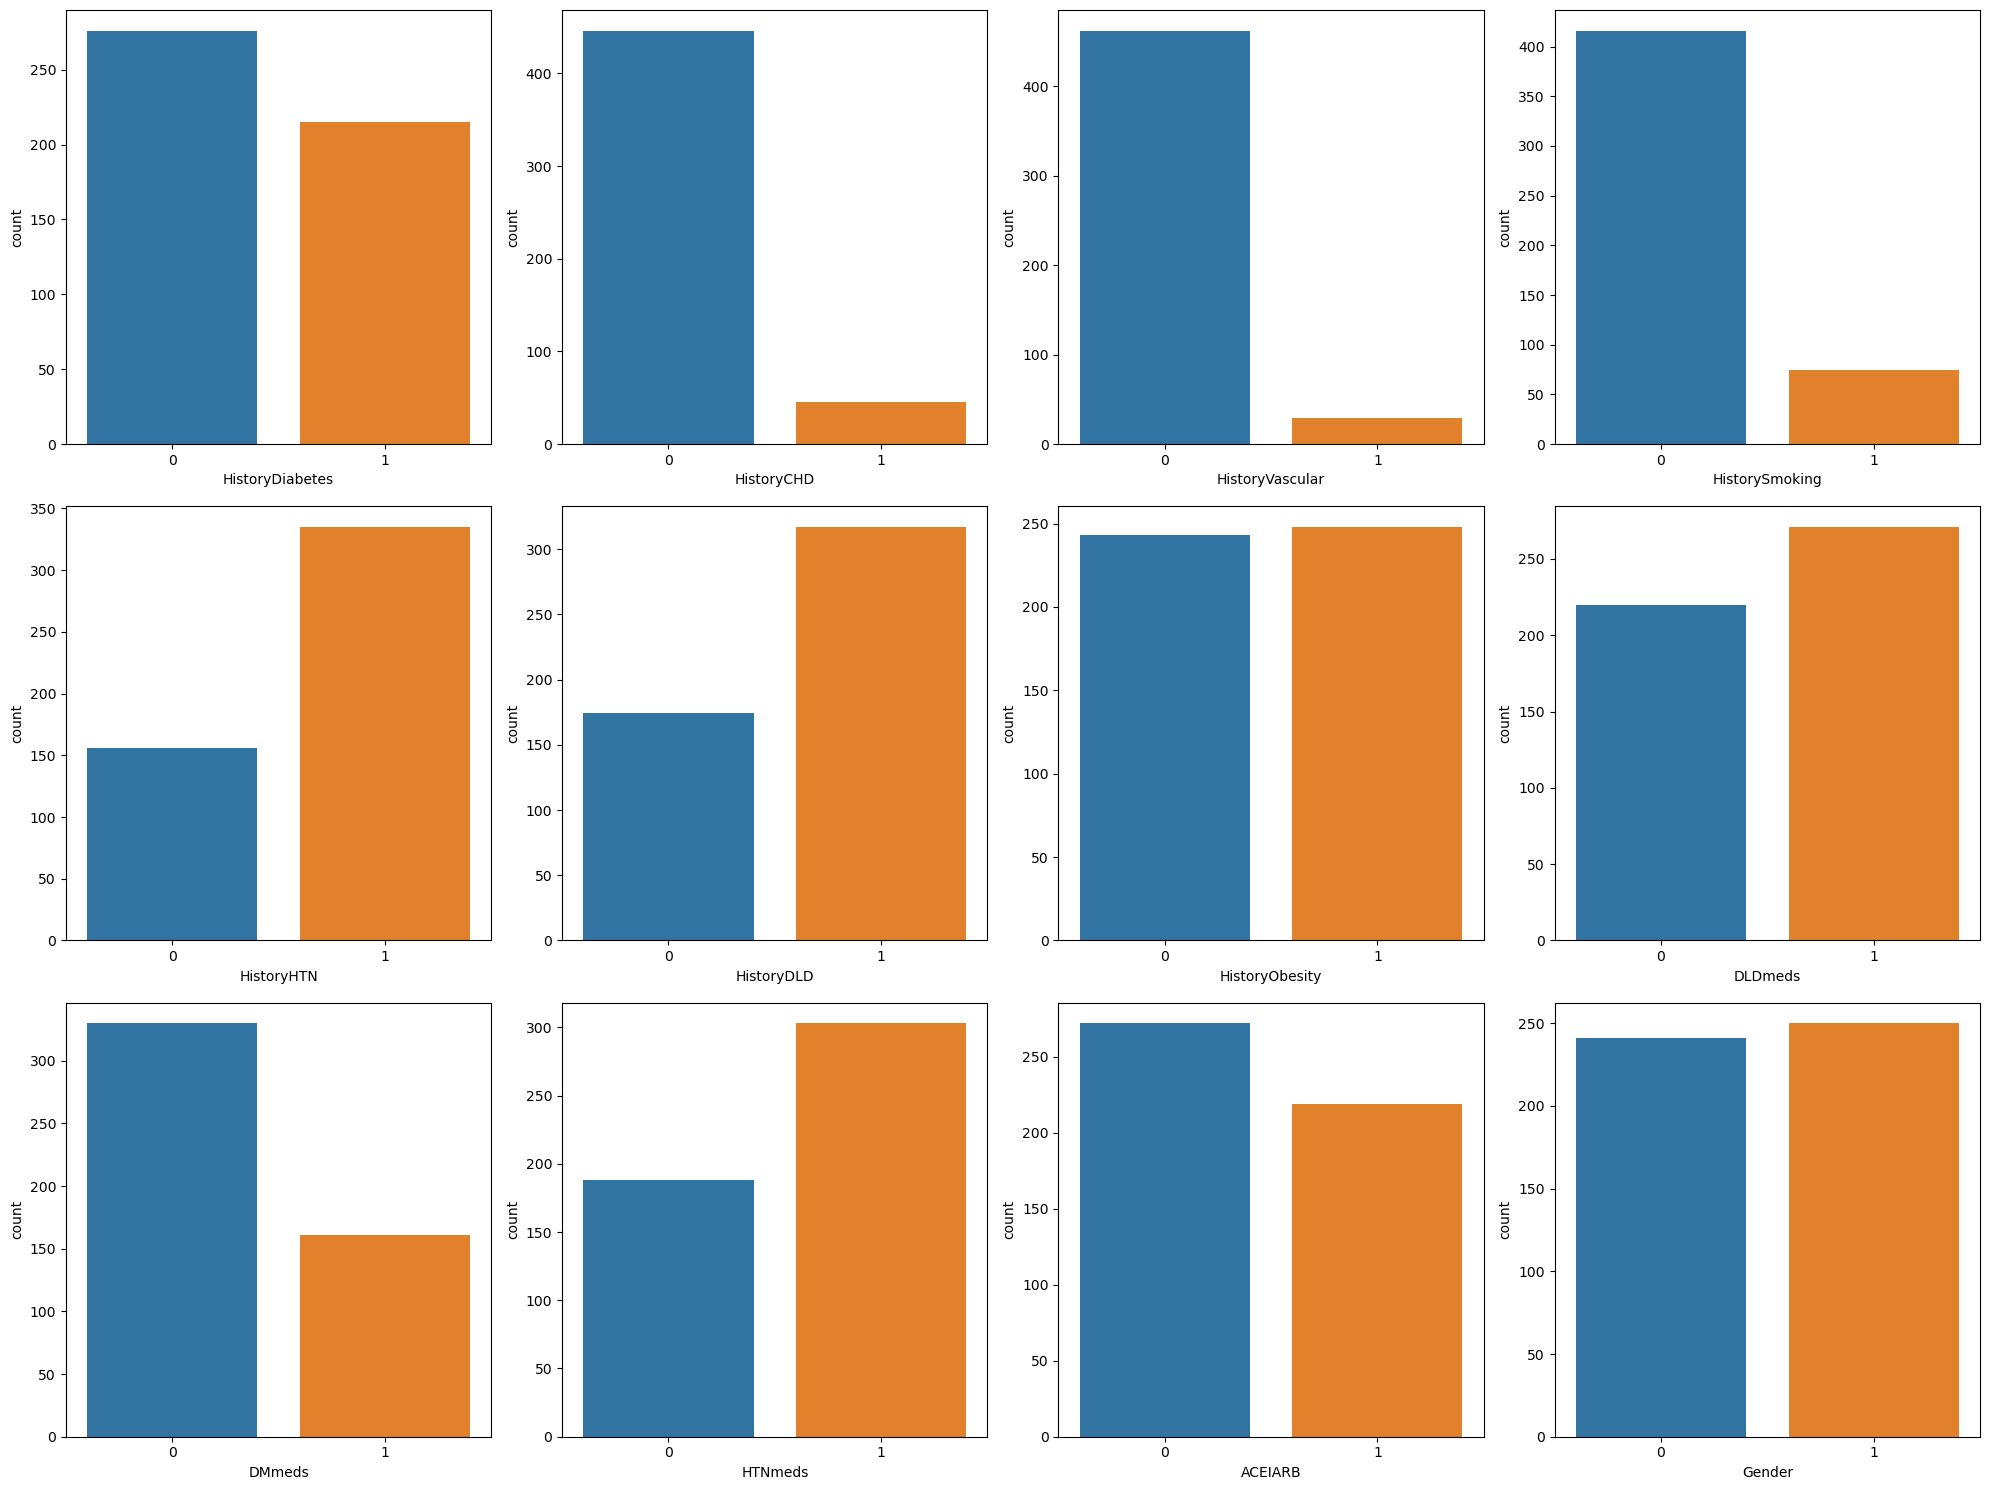

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print("\nSummary statistics:")
print(processed_df.describe())

# Distribution of numerical features
numerical_columns = ['AgeBaseline', 'CholesterolBaseline', 'TriglyceridesBaseline', 'HgbA1C', 'CreatnineBaseline', 
                     'eGFRBaseline', 'sBPBaseline', 'dBPBaseline', 'BMIBaseline', 'TimeToEventMonths']

print("\nHistograms of numerical features:")
processed_df[numerical_columns].hist(bins=15, figsize=(20, 10), layout=(3, 4))
plt.tight_layout()
plt.show()

# Correlation matrix
print("\nCorrelation matrix:")
corr_matrix = processed_df[numerical_columns + ['EventCKD35']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of categorical features
binary_columns = ['HistoryDiabetes', 'HistoryCHD', 'HistoryVascular', 'HistorySmoking', 'HistoryHTN', 
                  'HistoryDLD', 'HistoryObesity', 'DLDmeds', 'DMmeds', 'HTNmeds', 'ACEIARB', 'Gender']

print("\nBar plots of categorical features:")
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
for i, col in enumerate(binary_columns):
    sns.countplot(x=col, data=processed_df, ax=axes[i//4, i%4])
plt.tight_layout()
plt.show()

### A concise description of the database, including interesting insights or observations:

The database includes demographic characteristics of the patient, lab test results, pt. history, exitence of common medications, time until the CKD event, and The target variable which is the existence/absence of EventCKD35.

<strong> Following our initial analysis we found some interesting insights: </strong>

1.   most of our numerical data is presenting a normal distribution. this will assist us in the future when we will come to deal with choosing our models.
2.   correclations:
      *  We can see a negative (0.59) corr between EGFR and Age, which can suggest that older people have less ability to filter toxins from the blood system,which makes sense.
      * Also a strong negative corr is found between the EGFR and the CreatnineBaseline, implementing that when EGFR is low, the body waste does not filter out from the bloodstream and therefore the createnine is high, which also makes sense.
      *  Finally, an interesting yet not strong negative corr is found between the number of months to event and the existence of CKD. Seems like when there is a lot of months from the review the chance for CKD35 existance is lowered. 
3.  about the categorial features:
    *  most of the patients have a history of Dislypidemia and are on DLD meds.
    * most of the patients also suffer from HTN and take HTN meds
    *  Althogh most of the pts have a history of diabetes, almost only a half of them are on diabetic meds. this can imply on wrong community treatment that may cause future complication, and is an interesting lead for us.


## 2. Feature Selection

<div align="justify"> 
<li value="1"> <strong> Statistical Filtering Approach: </strong> We'll use the Chi-Square test for categorical features and ANOVA F-test for numerical features. </li> <br>
&emsp; <strong> Chi-Square Test for Categorical Features: </strong> <br>
&emsp; <strong> Advantages: </strong> Simple and fast, helps in identifying the strength of association between categorical features and the target variable. <br> 
&emsp; <strong> Disadvantages:</strong> Assumes independence of features, which might not always be true. <br> 
<br>
&emsp; <strong> ANOVA F-test for Numerical Features: </strong> <br>
&emsp; <strong>  Advantages: </strong> Measures the linear relationship between features and the target variable, easy to interpret. <br>
&emsp; <strong>  Disadvantages: </strong> Assumes linear relationship, may not work well with non-linear relationships. <br>   
<br> 
<li value="1"> <strong> Wrapper Method: </strong> We'll use Recursive Feature Elimination (RFE) with a logistic regression model to select important features. </li> <br>
&emsp; <strong> Recursive Feature Elimination (RFE): </strong> <br>
&emsp; <strong> Advantages: </strong> Considers feature interactions, works well with various algorithms, selects features based on model performance. <br> 
&emsp; <strong> Disadvantages: </strong> Computationally expensive, may overfit on small datasets. <br> 
</div>

Top features selected by statistical filtering approach:
['DMmeds', 'HistoryCHD', 'HistoryDiabetes', 'ACEIARB', 'DLDmeds', 'TimeToEventMonths', 'eGFRBaseline', 'HgbA1C', 'CreatnineBaseline', 'AgeBaseline']


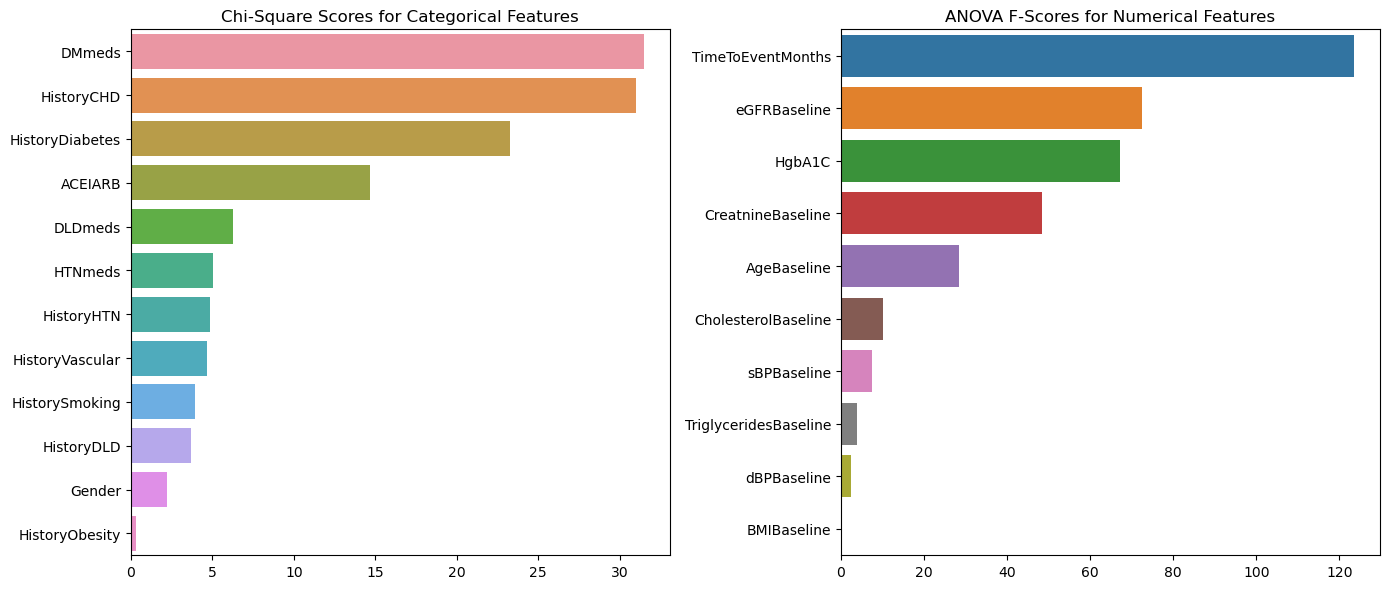

Top features selected by RFE:
['HistorySmoking', 'HTNmeds', 'ACEIARB', 'Gender', 'Age.3.categories_0', 'CholesterolBaseline', 'HgbA1C', 'eGFRBaseline', 'BMIBaseline', 'TimeToEventMonths']


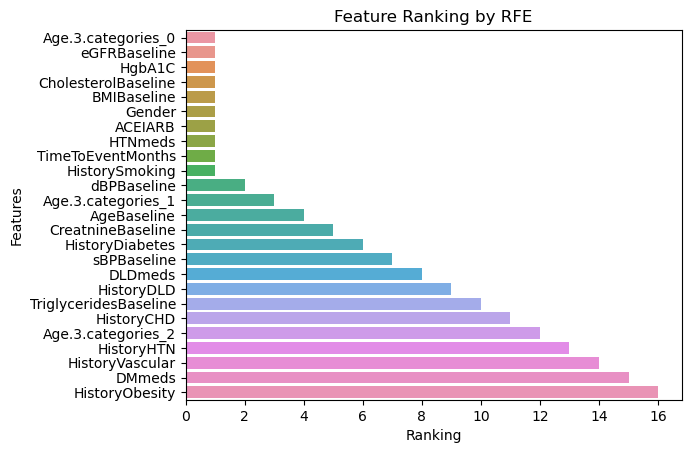

In [9]:
from sklearn.feature_selection import chi2, f_classif
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# If StudyID is already the index, proceed without it in the feature matrix
X = processed_df.drop(columns=['EventCKD35'])
y = processed_df['EventCKD35']

# Binary and numerical columns
binary_columns = ['HistoryDiabetes', 'HistoryCHD', 'HistoryVascular', 'HistorySmoking', 'HistoryHTN', 
                  'HistoryDLD', 'HistoryObesity', 'DLDmeds', 'DMmeds', 'HTNmeds', 'ACEIARB', 'Gender']
categorical_columns = ['Age.3.categories']
numerical_columns = ['AgeBaseline', 'CholesterolBaseline', 'TriglyceridesBaseline', 'HgbA1C', 'CreatnineBaseline', 
                     'eGFRBaseline', 'sBPBaseline', 'dBPBaseline', 'BMIBaseline', 'TimeToEventMonths']

# Chi-Square test for categorical features
chi2_features = chi2(X[binary_columns], y)
chi2_scores = pd.Series(chi2_features[0], index=binary_columns).sort_values(ascending=False)

# ANOVA F-test for numerical features
anova_features = f_classif(X[numerical_columns], y)
anova_scores = pd.Series(anova_features[0], index=numerical_columns).sort_values(ascending=False)

# Combine scores and select top features
top_categorical_features = chi2_scores.head(5).index.tolist()
top_numerical_features = anova_scores.head(5).index.tolist()
top_features_statistical = top_categorical_features + top_numerical_features

print("Top features selected by statistical filtering approach:")
print(top_features_statistical)

# Plot feature importance for statistical approach
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x=chi2_scores.values, y=chi2_scores.index, ax=axes[0])
axes[0].set_title('Chi-Square Scores for Categorical Features')
sns.barplot(x=anova_scores.values, y=anova_scores.index, ax=axes[1])
axes[1].set_title('ANOVA F-Scores for Numerical Features')
plt.tight_layout()
plt.show()

# Recursive Feature Elimination (RFE)
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=10, step=1)
rfe.fit(X, y)

# Get the selected features
rfe_support = rfe.get_support()
rfe_features = X.columns[rfe_support].tolist()

print("Top features selected by RFE:")
print(rfe_features)

# Plot feature importance for RFE approach
rfe_ranking = pd.Series(rfe.ranking_, index=X.columns).sort_values()
sns.barplot(x=rfe_ranking.values, y=rfe_ranking.index)
plt.title('Feature Ranking by RFE')
plt.xlabel('Ranking')
plt.ylabel('Features')
plt.show()

<li value="1"> <strong> The information after feature selection. </strong> The information contains the leading filters obtained from the Statistical Filtering Approach and the Wrapper Method. </li> <br> 

In [10]:
# Information after feature selection
processed_df_FS = processed_df[['HistorySmoking', 'HTNmeds', 'ACEIARB', 'Gender', 'Age.3.categories_0',
                                'CholesterolBaseline', 'HgbA1C', 'eGFRBaseline', 'BMIBaseline', 'TimeToEventMonths',
                                'DMmeds', 'HistoryCHD', 'HistoryDiabetes',  'DLDmeds', 'CreatnineBaseline', 'AgeBaseline', 'EventCKD35']]
processed_df_FS.shape

(491, 17)

In [11]:
processed_df_FS.tail()

HistorySmoking  HTNmeds  ACEIARB  Gender  Age.3.categories_0  \
StudyID                                                                 
959                   0        0        0       1                 1.0   
962                   0        0        0       1                 1.0   
965                   0        0        0       1                 1.0   
967                   1        1        1       1                 1.0   
968                   0        0        0       1                 1.0   

         CholesterolBaseline    HgbA1C  eGFRBaseline  BMIBaseline  \
StudyID                                                             
959                 0.191083 -0.083333      1.064616    -0.764359   
962                 0.573248  0.000000      0.532986     0.498543   
965                 0.898089  4.333333      0.587624     0.779272   
967                -0.636943 -0.083333     -0.454419    -1.042447   
968                -1.764331 -1.500000      1.364007    -1.154588   

         TimeToEventMonths  DMmeds  HistoryCHD  HistoryDiabetes  DLDmeds  \
StudyID                                                                    
959               0.391304       0           0                0        0   
962               0.043478       0           0                0        0   
965              -4.043478       1           0                1        1   
967              -2.521739       0           0                0        1   
968               0.565217       0           0                0        0   

         CreatnineBaseline  AgeBaseline  EventCKD35  
StudyID                                              
959               0.297872        -1.45           0  
962               0.042553        -0.45           0  
965               0.012766        -0.50           0  
967               1.148936        -0.65           1  
968              -0.042553        -1.50           0

## 3. Class Imbalance

### ## The section for all information without feature selection

<li value="1"> First we will analyze the distribution of the target variable in the database. </li>

Distribution of the target variable (EventCKD35):
0    0.885947
1    0.114053
Name: EventCKD35, dtype: float64


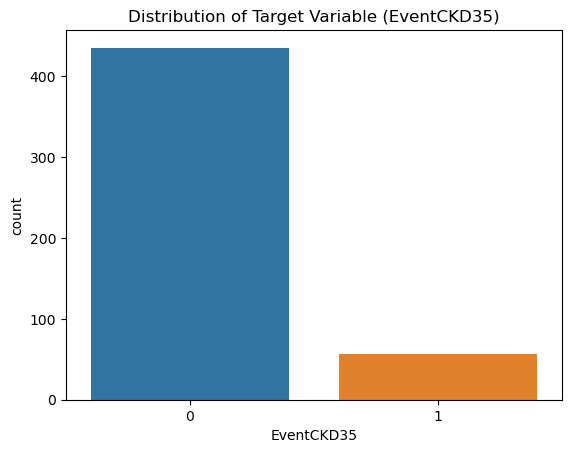

In [12]:
# Analyze the distribution of the target variable
target_distribution = processed_df_FS['EventCKD35'].value_counts(normalize=True)
print("Distribution of the target variable (EventCKD35):")
print(target_distribution)

# Plot the distribution
sns.countplot(x='EventCKD35', data=processed_df)
plt.title('Distribution of Target Variable (EventCKD35)')
plt.show()

<div align="justify">
    
<strong> Handling Class Imbalance </strong> <br>
<li value="1"> <strong> SMOTE (Synthetic Minority Over-sampling Technique): </strong> Generates synthetic samples for the minority class. </li> <br>
&emsp; <strong> Advantages: </strong> <br>
&emsp; Generates synthetic samples rather than duplicating existing ones. <br>
&emsp; Helps in making the class distribution more balanced without losing information. <br>
&emsp; <strong> Disadvantages:</strong> <br>
&emsp; May introduce noise if the synthetic samples are not generated properly.<br>
<br>     
<li value="1"> <strong> Random Under-sampling: </strong> Reduces the number of samples in the majority class.</li> <br>
&emsp; <strong> Advantages: </strong> <br>
&emsp; Simple and quick to implement.<br>
&emsp; Reduces the size of the dataset, which can speed up training. <br>
&emsp; <strong> Disadvantages: </strong> <br>
&emsp; May lead to loss of important information from the majority class. <br>    
<br>     
<br>       
<strong> Explanation and Justification </strong> <br>
<li value="1"> <strong> SMOTE: </strong> Chosen to generate synthetic samples for the minority class, thereby balancing the class distribution without losing information. </li>
Suitable when the minority class is significantly smaller than the majority class. </li> <br>
<li value="1"> <strong> Random Under-sampling: </strong> Chosen to quickly balance the class distribution by reducing the majority class samples.
Suitable when the dataset is large, and losing some majority class samples will not impact the overall model performance. </li> <br>     
</div>

After SMOTE, the distribution of the target variable is:
Counter({0: 348, 1: 348})


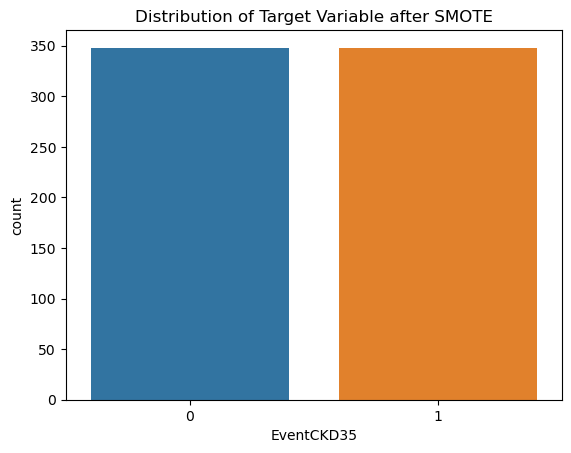

After Random Under-sampling, the distribution of the target variable is:
Counter({0: 44, 1: 44})


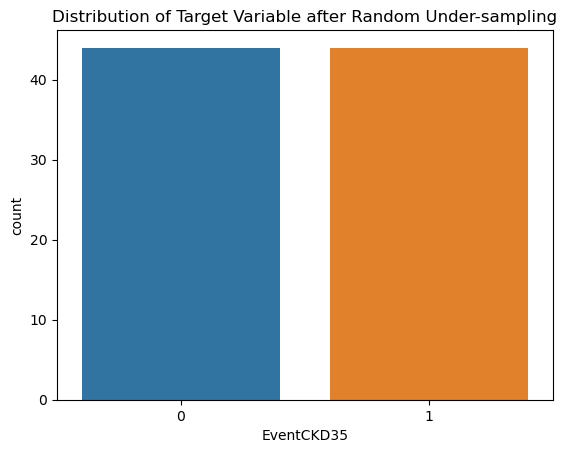

In [13]:
# Applying SMOTE and Random Under-sampling

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Separate features and target
X = processed_df_FS.drop(columns=['EventCKD35'])
y = processed_df_FS['EventCKD35']

# Separate to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print("After SMOTE, the distribution of the target variable is:")
print(Counter(y_smote))

# Plot the new distribution after SMOTE
sns.countplot(x=y_smote)
plt.title('Distribution of Target Variable after SMOTE')
plt.show()

# Apply Random Under-sampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print("After Random Under-sampling, the distribution of the target variable is:")
print(Counter(y_rus))

# Plot the new distribution after Random Under-sampling
sns.countplot(x=y_rus)
plt.title('Distribution of Target Variable after Random Under-sampling')
plt.show()

### ## The section for the information in which feature selection was performed

<li value="1"> <strong> No change is seen in this section </strong> between the information without the feature selection and with the feature selection because both have the same target column EventCKD35 </li>

Distribution of the target variable (EventCKD35):
0    0.885947
1    0.114053
Name: EventCKD35, dtype: float64


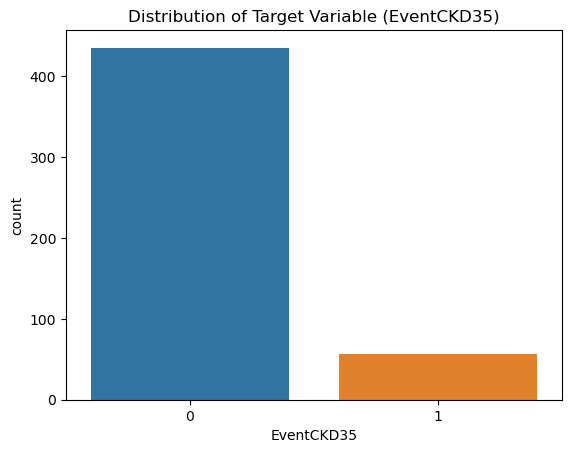

In [14]:
# Analyze the distribution of the target variable
target_distribution = processed_df_FS['EventCKD35'].value_counts(normalize=True)
print("Distribution of the target variable (EventCKD35):")
print(target_distribution)

# Plot the distribution
sns.countplot(x='EventCKD35', data=processed_df)
plt.title('Distribution of Target Variable (EventCKD35)')
plt.show()

After SMOTE, the distribution of the target variable is:
Counter({0: 348, 1: 348})


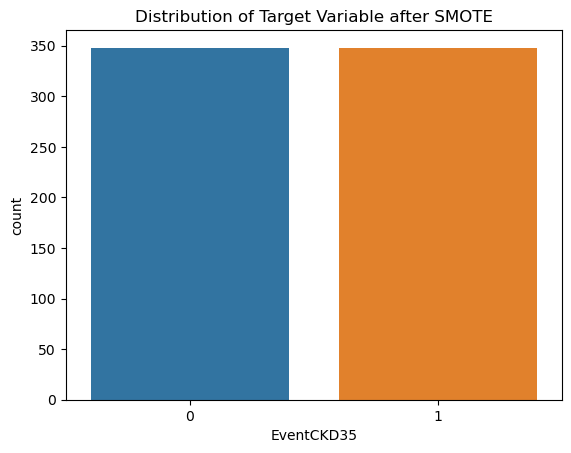

After Random Under-sampling, the distribution of the target variable is:
Counter({0: 44, 1: 44})


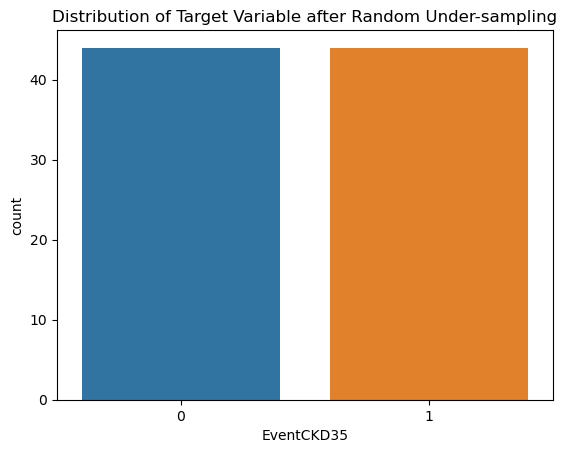

In [15]:
# Applying SMOTE and Random Under-sampling

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Separate features and target
X = processed_df_FS.drop(columns=['EventCKD35'])
y = processed_df_FS['EventCKD35']

# Separate to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print("After SMOTE, the distribution of the target variable is:")
print(Counter(y_smote))

# Plot the new distribution after SMOTE
sns.countplot(x=y_smote)
plt.title('Distribution of Target Variable after SMOTE')
plt.show()

# Apply Random Under-sampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print("After Random Under-sampling, the distribution of the target variable is:")
print(Counter(y_rus))

# Plot the new distribution after Random Under-sampling
sns.countplot(x=y_rus)
plt.title('Distribution of Target Variable after Random Under-sampling')
plt.show()

## 4. Model Training and Evaluation

### ## The section for all information without feature selection

<li value="1"> <strong> Data Preparation </strong>  </li> 

In [16]:
# Data Preparation

# Separate features and target
X = processed_df.drop(columns=['EventCKD35'])
y = processed_df['EventCKD35']

# Separate to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We will continue with the training information passed by SMOTE so that the training will be with imbalance
# But the test be without imbalance so we wont create overfitting
X_train, y_train = smote.fit_resample(X_train, y_train)

# Verify the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(696, 25) (99, 25) (696,) (99,)


<strong> We will train the following models:</strong> 
<li value="1"> Logistic Regression </li> 
<li value="1"> Decision Tree </li> 
<li value="1"> Random Forest </li>
<li value="1"> Support Vector Machine (SVM) </li> 

Because in our research they also tested XGBOOST, we tested it only for this part, and because it does not produce different and better results, we do not continue with it

In [17]:
# !pip install xgboost

In [18]:
# Model Training

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb

# Initialize the models
log_reg = LogisticRegression(random_state=42)
dec_tree = DecisionTreeClassifier(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42, probability=True)
xgb_model = xgb.XGBClassifier(random_state=42)

# List of models
models = [log_reg, dec_tree, rand_forest, svm, xgb_model]

# Train and evaluate the models
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Evaluation metrics for {model.__class__.__name__}:")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.2f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.2f}")
    print("-----")

Evaluation metrics for LogisticRegression:
Precision: 0.47
Recall: 0.67
F1-score: 0.55
ROC-AUC: 0.78
-----
Evaluation metrics for DecisionTreeClassifier:
Precision: 0.43
Recall: 0.50
F1-score: 0.46
ROC-AUC: 0.70
-----
Evaluation metrics for RandomForestClassifier:
Precision: 0.56
Recall: 0.42
F1-score: 0.48
ROC-AUC: 0.69
-----
Evaluation metrics for SVC:
Precision: 0.41
Recall: 0.58
F1-score: 0.48
ROC-AUC: 0.73
-----
Evaluation metrics for XGBClassifier:
Precision: 0.45
Recall: 0.42
F1-score: 0.43
ROC-AUC: 0.67
-----


<li value="1"> <strong> Cross-Validation and Hyperparameter Tuning: </strong> we will use GridSearchCV for hyperparameter tuning and cross-validation. </li> 

In [19]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grids = {
    'log_reg': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'dec_tree': {
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10]
    },
    'rand_forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15]
    },
    'svm': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}

# Models with parameter grids
model_param_grid = {
    'log_reg': (log_reg, param_grids['log_reg']),
    'dec_tree': (dec_tree, param_grids['dec_tree']),
    'rand_forest': (rand_forest, param_grids['rand_forest']),
    'svm': (svm, param_grids['svm'])
}

# Perform GridSearchCV for each model
best_models = {}
for model_name, (model, param_grid) in model_param_grid.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Best parameters for log_reg: {'C': 10, 'solver': 'liblinear'}
Best parameters for dec_tree: {'max_depth': 10, 'min_samples_split': 10}
Best parameters for rand_forest: {'max_depth': 15, 'n_estimators': 300}
Best parameters for svm: {'C': 10, 'kernel': 'rbf'}


<li value="1"> <strong> Evaluation and Comparison: </strong> evaluate the tuned models on the test set and plot the ROC and Precision-Recall curves. </li> 




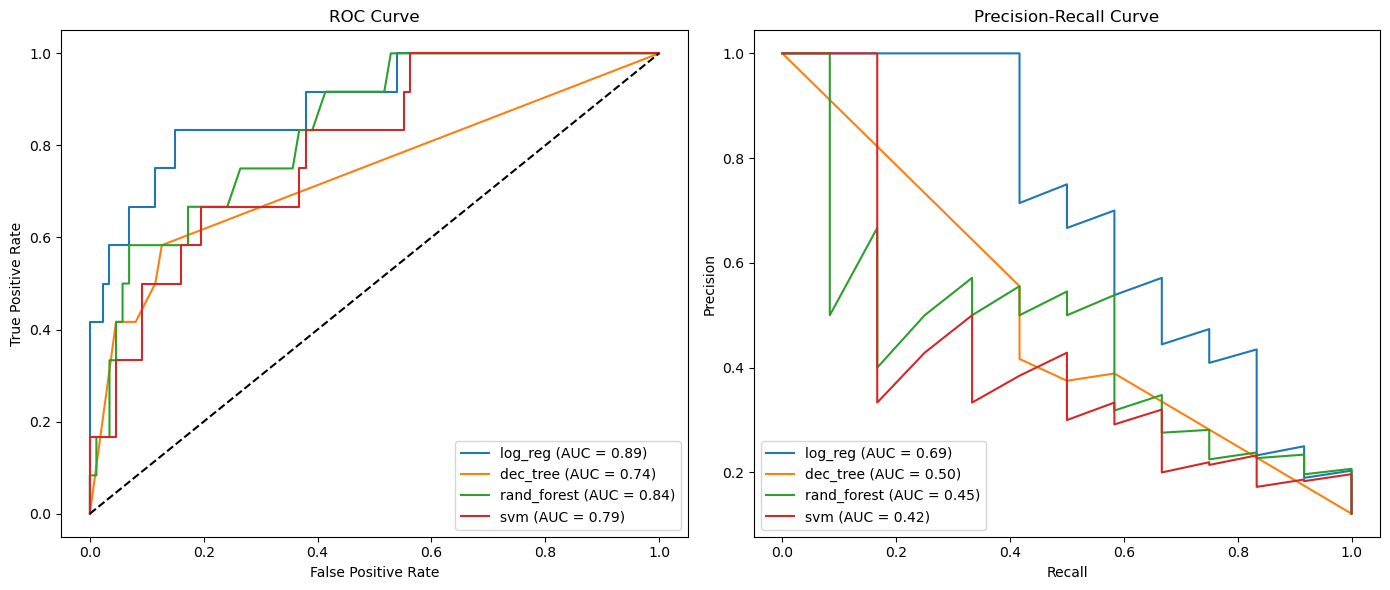

In [20]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score, f1_score, precision_score, recall_score

# Function to plot ROC and Precision-Recall curves
def plot_roc_pr_curves(models, X_test, y_test):
    plt.figure(figsize=(14, 6))

    # Plot ROC Curve
    plt.subplot(1, 2, 1)
    for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

    # Plot Precision-Recall Curve
    plt.subplot(1, 2, 2)
    for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{name} (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')

    plt.tight_layout()
    plt.show()

# Plot ROC and Precision-Recall curves
plot_roc_pr_curves(best_models, X_test, y_test)

### ## The section for the information in which feature selection was performed

<li value="1"> <strong> Data Preparation </strong>  </li> 

In [21]:
# Data Preparation

# Separate features and target
X = processed_df_FS.drop(columns=['EventCKD35'])
y = processed_df_FS['EventCKD35']

# Separate to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We will continue with the training information passed by SMOTE so that the training will be with imbalance
# But the test be without imbalance so we wont create overfitting
X_train, y_train = smote.fit_resample(X_train, y_train)

# Verify the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(696, 16) (99, 16) (696,) (99,)


<strong> We will train the following models:</strong> 
<li value="1"> Logistic Regression </li> 
<li value="1"> Decision Tree </li> 
<li value="1"> Random Forest </li>
<li value="1"> Support Vector Machine (SVM) </li> 

In [22]:
# Model Training

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Initialize the models
log_reg = LogisticRegression(random_state=42)
dec_tree = DecisionTreeClassifier(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42, probability=True)

# List of models
models = [log_reg, dec_tree, rand_forest, svm]

# Train and evaluate the models
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Evaluation metrics for {model.__class__.__name__}:")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.2f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.2f}")
    print("-----")

Evaluation metrics for LogisticRegression:
Precision: 0.38
Recall: 0.75
F1-score: 0.50
ROC-AUC: 0.79
-----
Evaluation metrics for DecisionTreeClassifier:
Precision: 0.44
Recall: 0.67
F1-score: 0.53
ROC-AUC: 0.78
-----
Evaluation metrics for RandomForestClassifier:
Precision: 0.50
Recall: 0.33
F1-score: 0.40
ROC-AUC: 0.64
-----
Evaluation metrics for SVC:
Precision: 0.37
Recall: 0.58
F1-score: 0.45
ROC-AUC: 0.72
-----


<li value="1"> <strong> Cross-Validation and Hyperparameter Tuning: </strong> we will use GridSearchCV for hyperparameter tuning and cross-validation. </li> 

In [23]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grids = {
    'log_reg': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'dec_tree': {
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10]
    },
    'rand_forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15]
    },
    'svm': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}

# Models with parameter grids
model_param_grid = {
    'log_reg': (log_reg, param_grids['log_reg']),
    'dec_tree': (dec_tree, param_grids['dec_tree']),
    'rand_forest': (rand_forest, param_grids['rand_forest']),
    'svm': (svm, param_grids['svm'])
}

# Perform GridSearchCV for each model
best_models = {}
for model_name, (model, param_grid) in model_param_grid.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Best parameters for log_reg: {'C': 10, 'solver': 'liblinear'}
Best parameters for dec_tree: {'max_depth': 10, 'min_samples_split': 10}
Best parameters for rand_forest: {'max_depth': 15, 'n_estimators': 100}
Best parameters for svm: {'C': 10, 'kernel': 'rbf'}


<li value="1"> <strong> Evaluation and Comparison: </strong> evaluate the tuned models on the test set and plot the ROC and Precision-Recall curves. </li> 




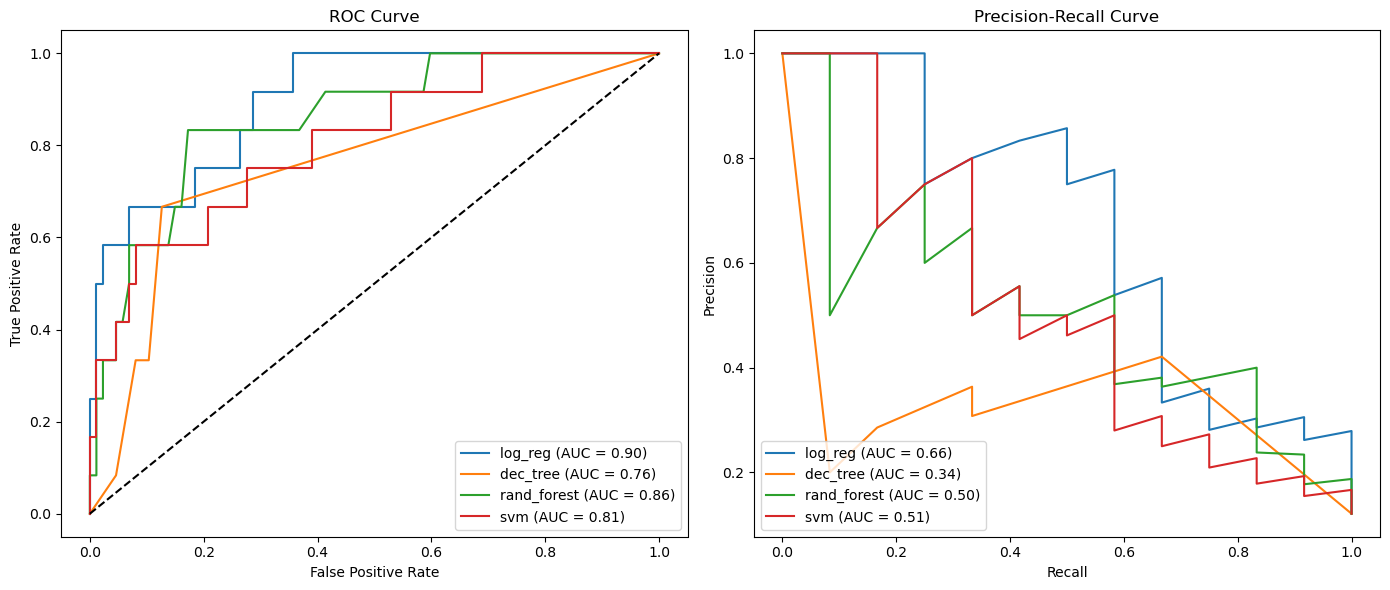

In [24]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score, f1_score, precision_score, recall_score

# Function to plot ROC and Precision-Recall curves
def plot_roc_pr_curves(models, X_test, y_test):
    plt.figure(figsize=(14, 6))

    # Plot ROC Curve
    plt.subplot(1, 2, 1)
    for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

    # Plot Precision-Recall Curve
    plt.subplot(1, 2, 2)
    for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{name} (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')

    plt.tight_layout()
    plt.show()

# Plot ROC and Precision-Recall curves
plot_roc_pr_curves(best_models, X_test, y_test)

### Choosing the Best Model 

<div align="justify">
<strong> Performance Measures: </strong> <br>
<li value="1"> <strong>  Precision: </strong> Important when the cost of false positives is high.</li>
<li value="1"> <strong>  Recall: </strong> Important when the cost of false negatives is high.</li>
<li value="1"> <strong>  F1-Score: </strong> Harmonic mean of precision and recall, useful when classes are unbalanced.</li>
<li value="1"> <strong>  ROC-AUC: </strong> Represents the model's ability to distinguish between classes.</li>
<li value="1"> <strong>  Precision-Recall AUC: </strong> More informative when dealing with unbalanced datasets.</li>
<br>
<strong> Considerations:</strong> <br>
If the cost of missing CKD is higher (false negatives), recall is crucial.<br>
If the cost of incorrectly predicting CKD is higher (false positives), precision is important.<br>
ROC-AUC and Precision-Recall AUC provide overall model performance.<br>
Based on the above considerations and the plotted curves, <strong> we will choose the Logistic Regression Classifier. </strong> <br> 
<br>     
<strong> Comparison of the information with feature selection and without feature selection: </strong> <br>    
Since we chose logistic regression as the best model for our data, when you look at the graphs obtained from the two types of information <strong> it actually seems better to continue with the complete information that did not undergo feature selection </strong>, and this is because the increase in the ROC CURVE graph is not high (from 0.89 for information without feature selection to 0.9 for information with feature selection) but the decrease in the Precision-Recall Curve graph is greater (from 0.69 for information without feature selection to 0.66 for information with feature selection)    
    
</div>

## 5. Explanatory AI

Installing libraries

In [25]:
# !pip install shap

In [26]:
# !pip install lime

<li value="1"> Applying <strong> SHAP: </strong> is a unified approach to explain the output of any machine learning model. It connects game theory with local explanations.</li>

<strong> Explaining a single prediction from the test set: </strong>

In [27]:
import shap
import numpy as np

# Separate features and target
X = processed_df.drop(columns=['EventCKD35'])
y = processed_df['EventCKD35']

# Separate to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

shap.initjs()

# Train the logistic regression model
model = LogisticRegression(C=10, solver='liblinear', random_state=42)
best_model = model.fit(X_train, y_train)

# Reduce the background samples using shap.sample (Adjust the number of samples as needed)
background_sample = shap.sample(X_train, 10)  # My calculation power is not great, so the amount is small

ex = shap.KernelExplainer(best_model.predict, background_sample)
shap_values = ex.shap_values(X_test.iloc[0,:])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0,:])

In the power graph that explains the current prediction, in which there is a person who is not sick with CKD35, we see that HTNmeds=0 is the most likely to attract the same prediction to prediction 1, that is, a sick person, followed by the DMmeds=0 feature, the eGFRBaseline=0.9324 feature, and the feature age.3.categories_0 =1 (ie the youngest group) drew the same prediction to stay at 0 ie not to be sick.

<strong> Summary: </strong>

  0%|          | 0/99 [00:00<?, ?it/s]

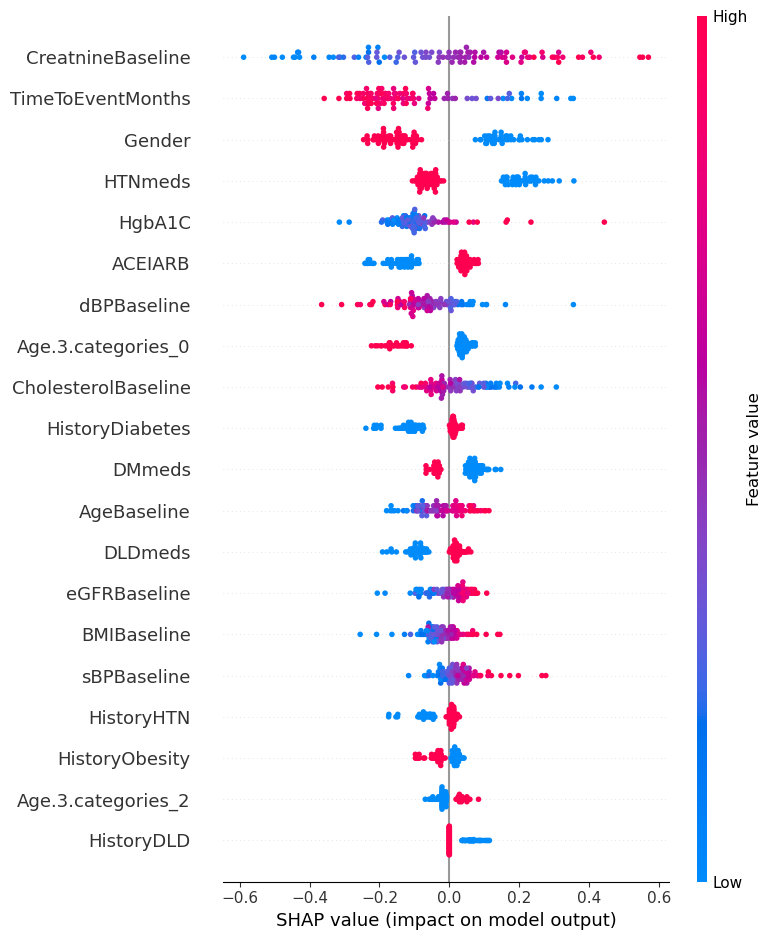

In [28]:
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

It can be seen that there are features that more clearly strengthen the prediction of the model among them; Event time in months, gender, HTNmeds, ACEIARB, diabetes history, age group, obesity history, DMmeads, triglycerides baseline.

**Conclusions**:

TimeToEventMonths: higher values reduce CKD likelihood, implying the longer time passes, the less likely it is a pt. will have CKD.

CreatinineBaseline: High values increase CKD likelihood, which is reasonable as high creatinine values appears at kidney disfunction.

Gender: women are more likely to impact on positive CKD prediction

Medications: untreated HTN pts (HTNMEDS=0) are more likely to be diagnosed with CKD.

Other Features: like baseline health metrics also influence predictions but not significantly.


<li value="1"> Applying <strong> LIME: </strong> LIME explains the predictions of any classifier by approximating it locally with an interpretable model.</li>

C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


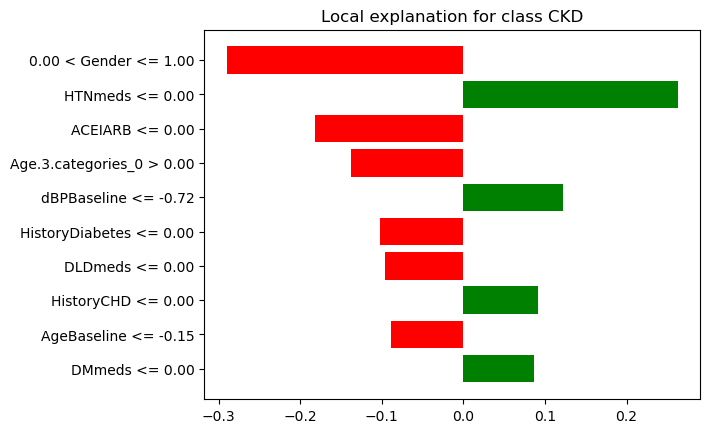

In [29]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Initialize LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=['No CKD', 'CKD'],  # Adjust based on your class names
    mode='classification'
)

# Choose an instance to explain (e.g., the first instance in the test set)
instance_index = 0

# Explain the instance
lime_explanation = lime_explainer.explain_instance(
    X_test.values[instance_index],
    best_model.predict_proba,
    num_features=10
)

# Display the explanation
lime_explanation.show_in_notebook(show_table=True)
plt.show()

# Alternatively, for a plot
lime_explanation.as_pyplot_figure()
plt.show()

Since this part was not included in the new assignment, we will describe the LIME very shortly:

Here, It was found that Gender and eGFRBaseline have the most significant negative contributions, indicating they strongly influence the model towards predicting CKD, while HTNmeds and dBPBaseline have the most substantial positive contributions, suggesting they decrease the likelihood of CKD in this instance.

## 6. sub-group analysis

### Homogeneous subgroup detection using k-means:

In [30]:
# Dividing the data into clusters according to the algorithm
def perform_clustering(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    processed_df['Cluster'] = kmeans.fit_predict(processed_df)
    return processed_df.copy(), kmeans.inertia_

# Evaluation of the quality of the distribution for 2, 4, 6, 8 clusters
cluster_counts = [2, 3, 4, 5, 6, 7, 8, 9]
sse_values = []

**To determine the optimal number of clusters, we will assess cluster quality by calculating both the Silhouette Index and SSE (Sum of Squared Errors)**

**Metrics Overview:**

**SSE (Sum of Squared Errors):**

Measures squared distances between data points and their cluster centroids.
It provides insights into how tightly grouped the data points are within their respective clusters; lower SSE implies denser clusters.

**Silhouette Score:**

Evaluates cluster separation quality.
Ranges from -1 to 1; higher values indicate better-defined clusters.
Scores near +1 show strong separation, 0 indicates boundary proximity, and negatives suggest potential misclassifications.

**The Elbow Method:**

Is a technique used to determine the optimal number of clusters when using clustering algorithms such as K-Means. The main idea behind this method is to identify the point where adding an additional cluster does not significantly improve the quality of the clustering.

Identifying the elbow point: Look for the point on the graph where there is a sharp change in the slope, i.e., the point where the decrease in WCSS (Within-Cluster Sum of Squares) becomes less pronounced. This point is identified as the "elbow" and indicates the optimal number of clusters.

C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusters: 2, SSE: 4747.785363869033, Silhouette Score: 0.2123029374913309


C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusters: 3, SSE: 4337.83658558578, Silhouette Score: 0.13553246222786683


C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusters: 4, SSE: 3935.7539660494904, Silhouette Score: 0.1596298575785836


C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusters: 5, SSE: 3677.9854224989417, Silhouette Score: 0.16914940332773648


C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusters: 6, SSE: 3557.256764158301, Silhouette Score: 0.1831659551395623


C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusters: 7, SSE: 3382.260432069127, Silhouette Score: 0.18022706839978184


C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusters: 8, SSE: 3278.8016091199747, Silhouette Score: 0.22157057595627877


C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusters: 9, SSE: 3204.88795601419, Silhouette Score: 0.1685845196472635


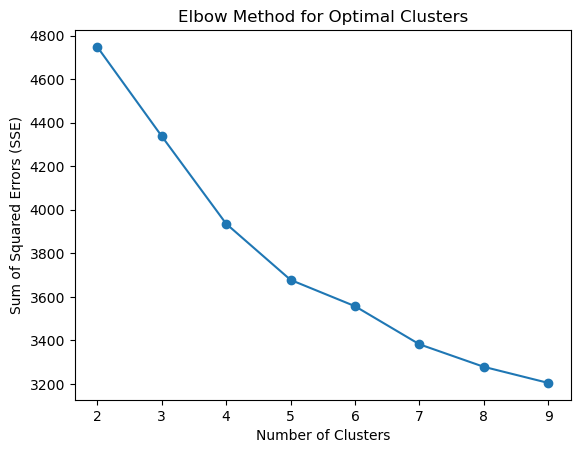

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


for n_clusters in cluster_counts:
    clustered_processed_df, sse = perform_clustering(n_clusters)
    silhouette_avg = silhouette_score(processed_df, clustered_processed_df['Cluster'])
    sse_values.append(sse)
    print(f"Clusters: {n_clusters}, SSE: {sse}, Silhouette Score: {silhouette_avg}")
    processed_df.drop("Cluster", axis=1)
    clustered_processed_df.drop("Cluster", axis=1)

plt.plot(cluster_counts, sse_values, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

Since we are looking for the lowest SSE and the highest silhouette, we will look at the results and see that the case with the lowest SSE is for dividing into 9 clusters and the highest silhouette is for dividing into 8 clusters. Therefore, if we look for the optimal situation, it seems that the division into 8 clusters returns the highest silhouette value (in relation to the other division options) and a relatively low SSE value (in relation to the other division options).

And if we check according to the elbow method, it seems that the division into 3 clusters has the most significant decrease in SSE, but the significant decrease continues between 3 and 4, also between 4 and 5, also between 5 and 6 and between 6 and 7 , between 7 and 8 the drop already seems a little less significant. Since we also look at the silhouette value, the optimal partition is chosen to partition into 8 clusters.

C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

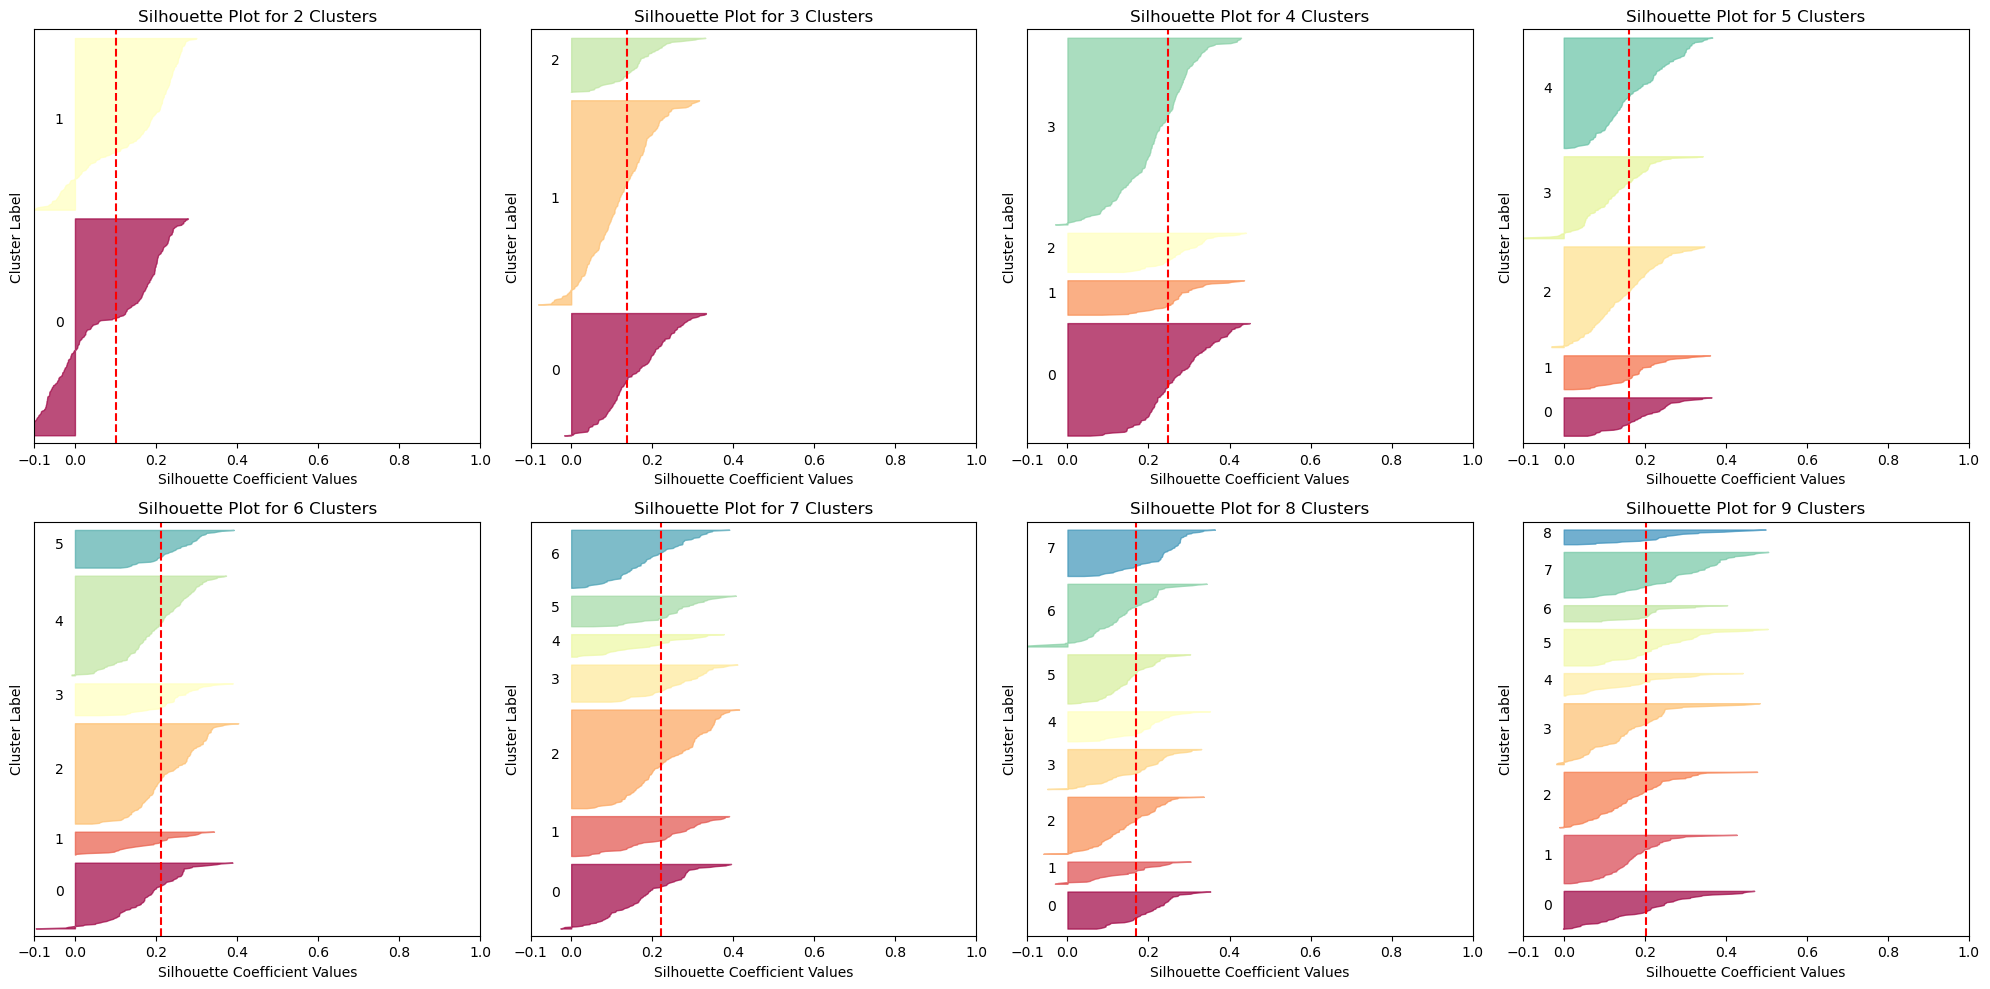

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize a list to store silhouette scores for each number of clusters
silhouette_scores = []

# Create subplots in a 2x4 grid (2 rows, 4 columns)
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Loop through different numbers of clusters
for idx, n_clusters in enumerate(cluster_counts):
    # Perform clustering and get cluster labels
    clustered_processed_df, _ = perform_clustering(n_clusters)
    cluster_labels = clustered_processed_df['Cluster']

    # Calculate silhouette score for each sample
    silhouette_vals = silhouette_samples(processed_df, cluster_labels)

    # Sort silhouette values for plotting
    silhouette_vals.sort()

    # Calculate average silhouette score for this number of clusters
    silhouette_avg = np.mean(silhouette_vals)
    silhouette_scores.append(silhouette_avg)

    # Determine the correct subplot
    ax = axs[idx // 4, idx % 4]

    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(processed_df) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        ith_cluster_silhouette_vals.sort()
        size_cluster_i = ith_cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.get_cmap("Spectral")(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_vals,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title(f"Silhouette Plot for {n_clusters} Clusters")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

    # Draw vertical line for average silhouette score
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])  # Clear y-axis ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.tight_layout()
plt.show()


To check the clusters we created we checked how the silhouette values ​​look, and whether the division into clusters for each case is clear or unclear.
We can see that the division into 7 clusters is a very good division! Each group is clearly separated from each other.

**We can say that 8 clusters will be ideal.**

In [33]:
import pandas as pd

n_clusters = 8
clustered_processed_df, sse = perform_clustering(n_clusters)

clustered_data = {}

# Iterate over each cluster and create a Pandas DataFrame
for cluster in range(n_clusters):
    cluster_data = clustered_processed_df[clustered_processed_df['Cluster'] == cluster].drop(columns='Cluster')
    clustered_data[f'cluster_{cluster}'] = cluster_data
    print(f"Created DataFrame: cluster_data[cluster_{cluster}]")


C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\YaelD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Created DataFrame: cluster_data[cluster_0]
Created DataFrame: cluster_data[cluster_1]
Created DataFrame: cluster_data[cluster_2]
Created DataFrame: cluster_data[cluster_3]
Created DataFrame: cluster_data[cluster_4]
Created DataFrame: cluster_data[cluster_5]
Created DataFrame: cluster_data[cluster_6]
Created DataFrame: cluster_data[cluster_7]


Displaying a pandas table with a cluster column, describing the division of the data into clusters

In [34]:
# Moving the new column to the right
column_to_move = clustered_processed_df.pop("Cluster")
clustered_processed_df.insert(0, "Cluster", column_to_move)

clustered_processed_df.head()

Cluster  HistoryDiabetes  HistoryCHD  HistoryVascular  \
StudyID                                                          
1              5                0           0                0   
2              5                0           0                0   
3              5                0           0                0   
4              0                0           0                0   
5              6                1           0                0   

         HistorySmoking  HistoryHTN  HistoryDLD  HistoryObesity  DLDmeds  \
StudyID                                                                    
1                     0           1           1               1        1   
2                     0           1           1               1        0   
3                     0           1           1               1        1   
4                     0           0           1               1        1   
5                     0           1           1               1        1   

         DMmeds  ...  CholesterolBaseline  TriglyceridesBaseline    HgbA1C  \
StudyID          ...                                                         
1             0  ...            -0.127389              -0.224852 -0.166667   
2             0  ...             0.891720               0.863905 -0.083333   
3             0  ...             0.891720               0.757396 -0.166667   
4             0  ...             0.063694               0.130178 -0.500000   
5             1  ...             0.000000               0.000000  1.133333   

         CreatnineBaseline  eGFRBaseline  sBPBaseline  dBPBaseline  \
StudyID                                                              
1                -0.297872     -0.205602         0.65     0.714286   
2                -0.595745      0.337768         0.85     1.000000   
3                -0.382979      0.077519         0.90     0.642857   
4                -0.042553     -0.336026        -0.75    -0.642857   
5                 0.170213     -0.795823         0.05    -1.000000   

         BMIBaseline  TimeToEventMonths  EventCKD35  
StudyID                                              
1           1.465828           0.217391           0  
2           2.071326           0.565217           0  
3           1.518640          -0.217391           0  
4           0.339801           0.434783           0  
5           0.164289           0.521739           0  

[5 rows x 27 columns]

Displaying an example Panda table, for cluster 0 (after dividing into 8 clusters)

In [35]:
clustered_data['cluster_0'].head() 

HistoryDiabetes  HistoryCHD  HistoryVascular  HistorySmoking  \
StudyID                                                                 
4                      0           0                0               0   
12                     0           0                0               1   
14                     0           0                0               0   
15                     0           0                0               0   
21                     0           0                0               0   

         HistoryHTN  HistoryDLD  HistoryObesity  DLDmeds  DMmeds  HTNmeds  \
StudyID                                                                     
4                 0           1               1        1       0        0   
12                0           1               0        0       0        0   
14                1           1               0        1       0        1   
15                1           1               0        1       0        1   
21                0           1               1        1       0        0   

         ...  CholesterolBaseline  TriglyceridesBaseline    HgbA1C  \
StudyID  ...                                                         
4        ...             0.063694               0.130178 -0.500000   
12       ...            -0.254777               1.656686 -0.833333   
14       ...             0.509554               0.390533  0.250000   
15       ...             0.318471               0.414201 -0.333333   
21       ...            -0.573248               0.000000  0.166667   

         CreatnineBaseline  eGFRBaseline  sBPBaseline  dBPBaseline  \
StudyID                                                              
4                -0.042553     -0.336026        -0.75    -0.642857   
12                1.021277     -0.696335        -0.50     0.071429   
14                1.234043     -1.255259         0.05    -1.428571   
15               -0.553191     -0.204951         0.85    -0.500000   
21               -0.297872     -0.233964         0.30    -0.071429   

         BMIBaseline  TimeToEventMonths  EventCKD35  
StudyID                                              
4           0.339801           0.434783           0  
12         -0.584857           0.521739           0  
14         -0.309864           0.130435           0  
15         -0.854090           0.304348           0  
21          0.354280           0.000000           0  

[5 rows x 26 columns]

Print for each cluster, the number of CKD35 patients

In [36]:
for cluster in range(n_clusters):
    cluster_sum_EventCKD35 = clustered_data[f'cluster_{cluster}'][clustered_data[f'cluster_{cluster}']['EventCKD35'] == 1].sum()['EventCKD35']
    print(f"Number of EventCKD35=1 in cluster_data[cluster_{cluster}:]", cluster_sum_EventCKD35)

Number of EventCKD35=1 in cluster_data[cluster_0:] 4.0
Number of EventCKD35=1 in cluster_data[cluster_1:] 27.0
Number of EventCKD35=1 in cluster_data[cluster_2:] 14.0
Number of EventCKD35=1 in cluster_data[cluster_3:] 0.0
Number of EventCKD35=1 in cluster_data[cluster_4:] 0.0
Number of EventCKD35=1 in cluster_data[cluster_5:] 5.0
Number of EventCKD35=1 in cluster_data[cluster_6:] 6.0
Number of EventCKD35=1 in cluster_data[cluster_7:] 0.0


**Since cluster 1 has the majority of CDK patients, we will examine what is special about this subgroup and for this subgroup we will run steps 1-5 as we did.**

### Performing steps 1 to 5 for the subgroup - cluster 1

#### 1. Data Exploration and Preprocessing

In [37]:
processed_df_cluster_subgroup = clustered_data['cluster_1']
processed_df_cluster_subgroup.tail()

HistoryDiabetes  HistoryCHD  HistoryVascular  HistorySmoking  \
StudyID                                                                 
795                    1           0                0               1   
882                    0           0                0               1   
917                    1           0                0               0   
931                    1           1                1               0   
967                    0           0                1               1   

         HistoryHTN  HistoryDLD  HistoryObesity  DLDmeds  DMmeds  HTNmeds  \
StudyID                                                                     
795               1           1               0        1       1        1   
882               1           0               0        0       0        1   
917               1           1               1        1       1        1   
931               1           1               0        1       1        1   
967               1           1               0        1       0        1   

         ...  CholesterolBaseline  TriglyceridesBaseline    HgbA1C  \
StudyID  ...                                                         
795      ...            -1.210191              -0.615385 -0.366667   
882      ...            -0.318471               0.402367 -0.333333   
917      ...             0.764331               0.248521 -0.908333   
931      ...            -0.382166              -0.047337  1.108333   
967      ...            -0.636943               0.023550 -0.083333   

         CreatnineBaseline  eGFRBaseline  sBPBaseline  dBPBaseline  \
StudyID                                                              
795               1.276596     -1.293026         0.45    -0.714286   
882               0.936170     -0.798216        -0.55    -0.214286   
917               0.425532     -0.220845        -1.05    -1.214286   
931               1.276596     -1.395335         1.10    -1.142857   
967               1.148936     -0.454419        -0.60    -0.785714   

         BMIBaseline  TimeToEventMonths  EventCKD35  
StudyID                                              
795        -0.788194          -3.391304           0  
882        -1.670662          -2.043478           0  
917         1.313684          -3.260870           0  
931        -0.878108          -3.869565           1  
967        -1.042447          -2.521739           1  

[5 rows x 26 columns]

In [38]:
processed_df_cluster_subgroup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 61 to 967
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HistoryDiabetes        53 non-null     int64  
 1   HistoryCHD             53 non-null     int64  
 2   HistoryVascular        53 non-null     int64  
 3   HistorySmoking         53 non-null     int64  
 4   HistoryHTN             53 non-null     int64  
 5   HistoryDLD             53 non-null     int64  
 6   HistoryObesity         53 non-null     int64  
 7   DLDmeds                53 non-null     int64  
 8   DMmeds                 53 non-null     int64  
 9   HTNmeds                53 non-null     int64  
 10  ACEIARB                53 non-null     int64  
 11  Gender                 53 non-null     int64  
 12  Age.3.categories_0     53 non-null     float64
 13  Age.3.categories_1     53 non-null     float64
 14  Age.3.categories_2     53 non-null     float64
 15  AgeBas


Summary statistics:
       HistoryDiabetes  HistoryCHD  HistoryVascular  HistorySmoking  \
count        53.000000   53.000000        53.000000       53.000000   
mean          0.641509    0.207547         0.132075        0.245283   
std           0.484146    0.409432         0.341813        0.434372   
min           0.000000    0.000000         0.000000        0.000000   
25%           0.000000    0.000000         0.000000        0.000000   
50%           1.000000    0.000000         0.000000        0.000000   
75%           1.000000    0.000000         0.000000        0.000000   
max           1.000000    1.000000         1.000000        1.000000   

       HistoryHTN  HistoryDLD  HistoryObesity    DLDmeds     DMmeds  \
count   53.000000   53.000000       53.000000  53.000000  53.000000   
mean     0.962264    0.735849        0.509434   0.716981   0.547170   
std      0.192380    0.445099        0.504695   0.454776   0.502533   
min      0.000000    0.000000        0.000000   0.00000

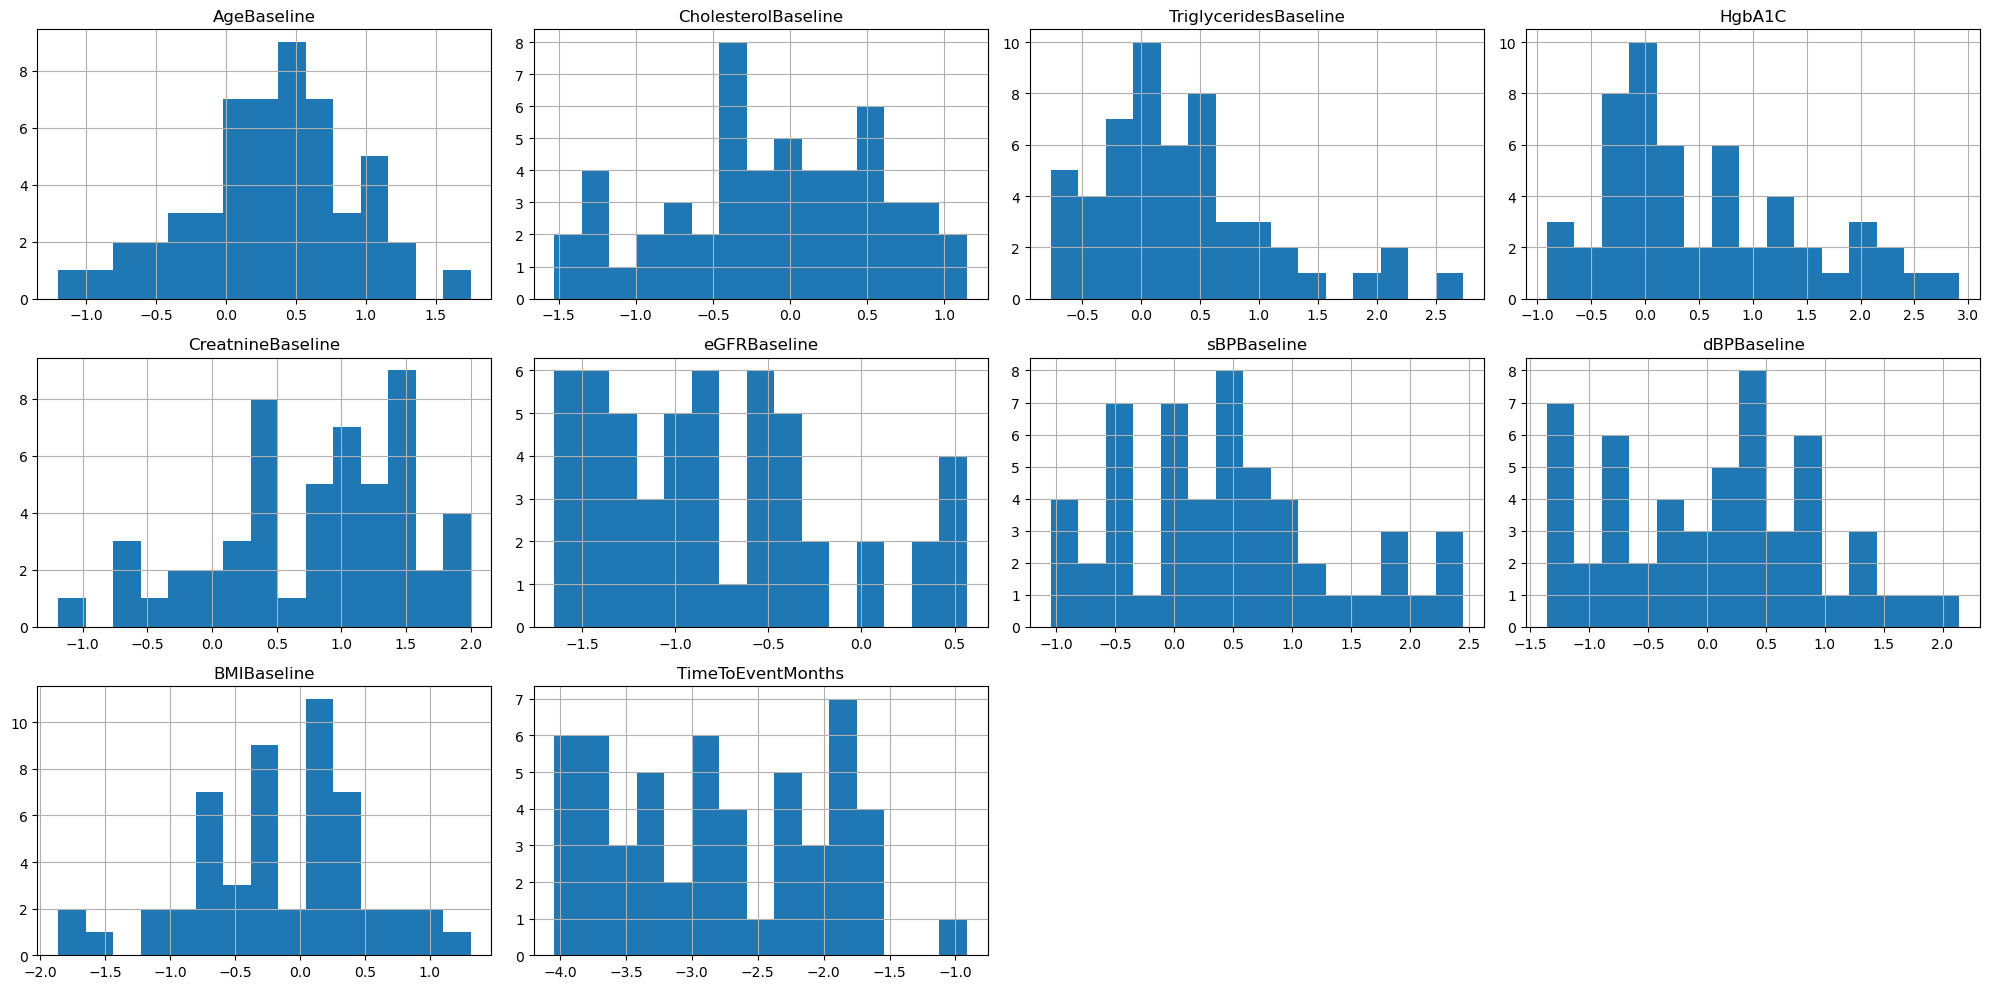


Correlation matrix:


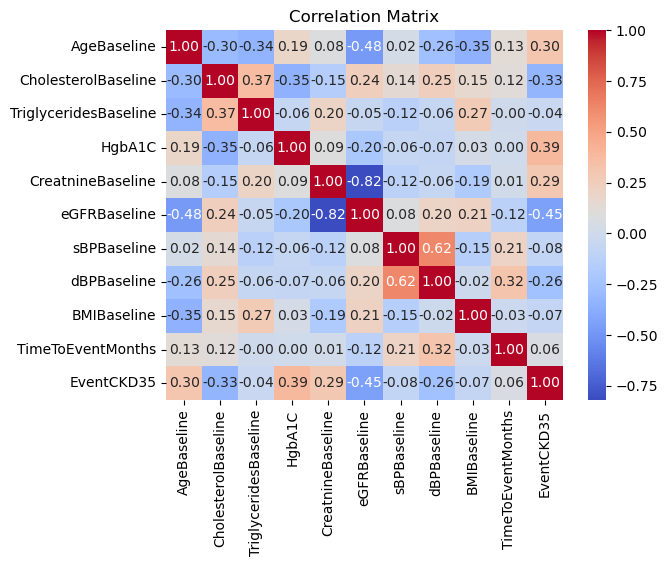


Bar plots of categorical features:


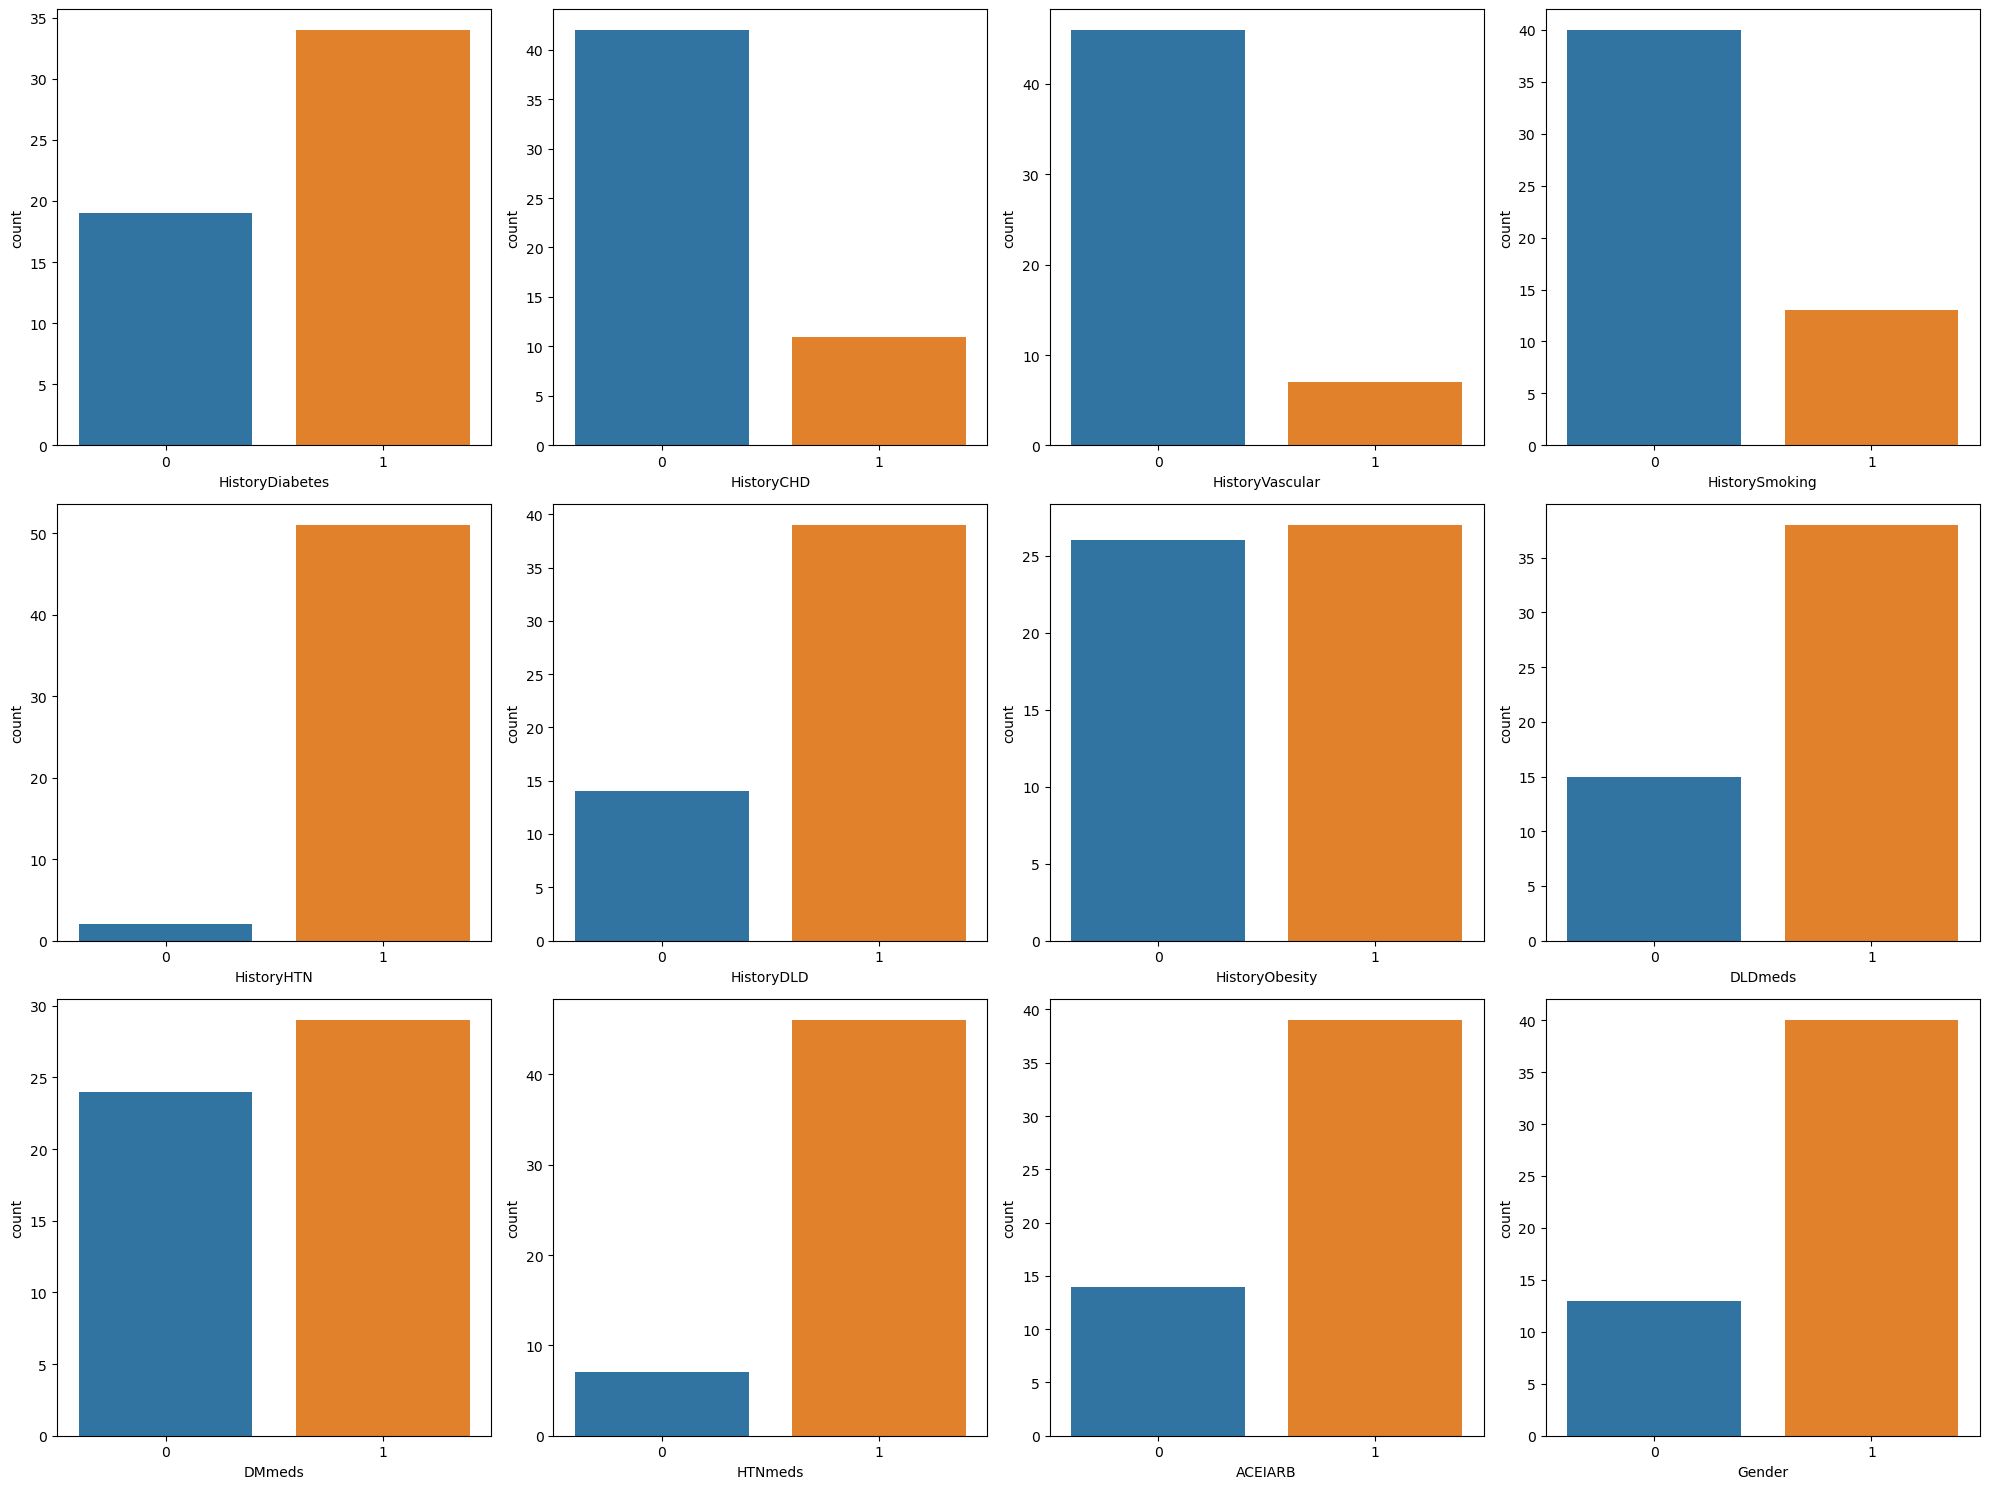

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print("\nSummary statistics:")
print(processed_df_cluster_subgroup.describe())

# Distribution of numerical features
numerical_columns = ['AgeBaseline', 'CholesterolBaseline', 'TriglyceridesBaseline', 'HgbA1C', 'CreatnineBaseline', 
                     'eGFRBaseline', 'sBPBaseline', 'dBPBaseline', 'BMIBaseline', 'TimeToEventMonths']

print("\nHistograms of numerical features:")
processed_df_cluster_subgroup[numerical_columns].hist(bins=15, figsize=(20, 10), layout=(3, 4))
plt.tight_layout()
plt.show()

# Correlation matrix
print("\nCorrelation matrix:")
corr_matrix = processed_df_cluster_subgroup[numerical_columns + ['EventCKD35']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of categorical features
binary_columns = ['HistoryDiabetes', 'HistoryCHD', 'HistoryVascular', 'HistorySmoking', 'HistoryHTN', 
                  'HistoryDLD', 'HistoryObesity', 'DLDmeds', 'DMmeds', 'HTNmeds', 'ACEIARB', 'Gender']

print("\nBar plots of categorical features:")
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
for i, col in enumerate(binary_columns):
    sns.countplot(x=col, data=processed_df_cluster_subgroup, ax=axes[i//4, i%4])
plt.tight_layout()
plt.show()

##### A concise description of the database, including interesting insights or observations:

The database includes demographic characteristics of the patient, lab test results, pt. history, exitence of common medications, time until the CKD event, and The target variable which is the existence/absence of EventCKD35.

<strong> Following our initial analysis we found some interesting insights: </strong>

1. The numeric data is sparser and most of it does not have a normal distribution. It is notable that the basline values, even when standardized, is higher than before and also the age baseline had shifted to higher values.
2. correlations:
  * The former (0.59) corr between EGFR and Age is now weaker (-0.49), but still supports that elderly have less ability to filter toxins from the blood system.
 * The negative corr between the EGFR and the CreatnineBaseline got stronger, supporting the claim that when EGFR is low, the body waste does not filter out and therefore the createnine is higher.
  *	The previously negative corr found between the number of months to event and the existence of CKD is no longer a remarkable correlatione, decreased to 0.06. it can be a result of the fact that the group is smaller and does not supply enough examples in that area.
3. Categorial features:
  *	The most significant change found in the current EDA is in the amount of people that consume ACE\ARB meds. It is reasonable when we examine the amount of HTN pts we have in our group , which is extremely high compared to the original amount. ACE\ARB meds are consumed by patients with high blood pressure and Kidney disease, as their purpose is to decrease the blood volume.
  *	The second significant change is in the amount of Male patients in our group, which is extremely higher than the female population. It gives us insight on the characteristics of our group.  
  *	Following, we have the DM patients, that now they are higher concentrated and unlike before, now the patients who consume the DMEDS are higher than the pts who don't.



#### 2. Feature Selection

Top features selected by statistical filtering approach:
['HistoryCHD', 'Age.3.categories_0', 'DMmeds', 'HistoryDiabetes', 'Age.3.categories_2', 'eGFRBaseline', 'HgbA1C', 'CholesterolBaseline', 'AgeBaseline', 'CreatnineBaseline']


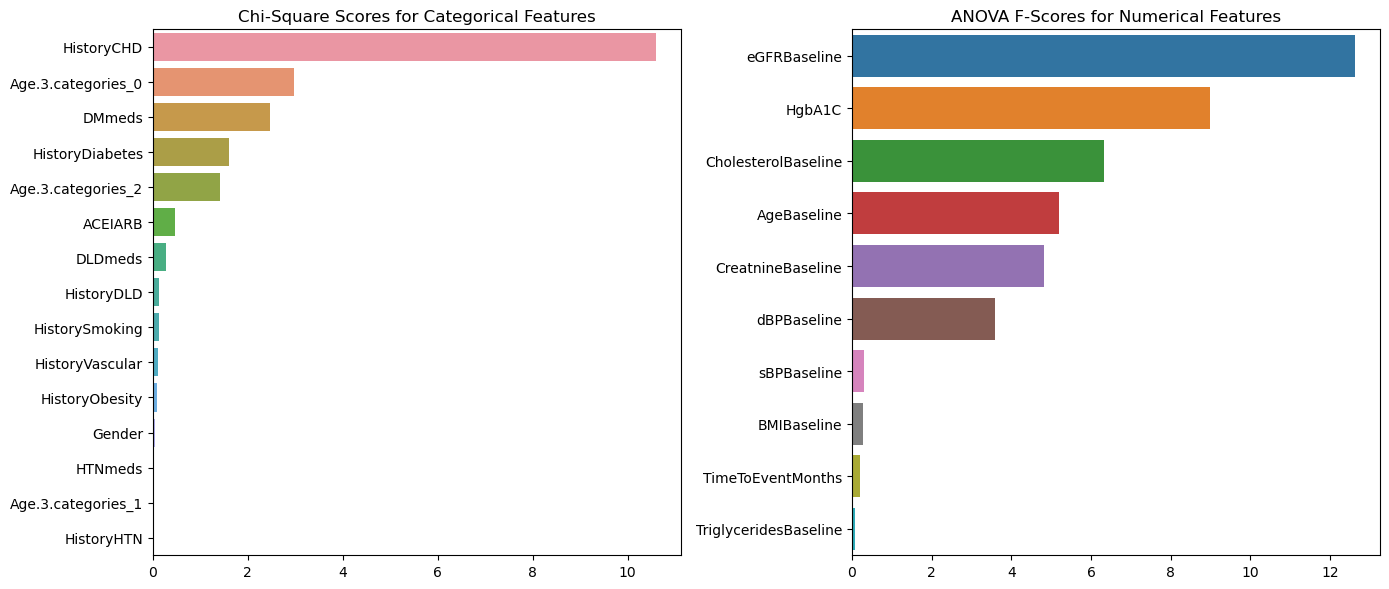

Top features selected by RFE:
['HistoryCHD', 'HistoryDLD', 'HistoryObesity', 'DMmeds', 'HTNmeds', 'HgbA1C', 'CreatnineBaseline', 'eGFRBaseline', 'dBPBaseline', 'TimeToEventMonths']


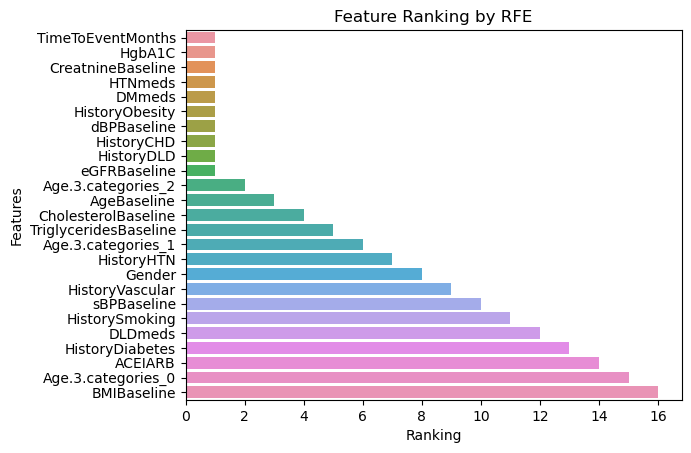

In [40]:
from sklearn.feature_selection import chi2, f_classif
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# If StudyID is already the index, proceed without it in the feature matrix
X = processed_df_cluster_subgroup.drop(columns=['EventCKD35'])
y = processed_df_cluster_subgroup['EventCKD35']

## Binary and numerical columns
binary_columns = ['HistoryDiabetes', 'HistoryCHD', 'HistoryVascular', 'HistorySmoking', 'HistoryHTN',
                  'HistoryDLD', 'HistoryObesity', 'DLDmeds', 'DMmeds', 'HTNmeds', 'ACEIARB', 'Gender','Age.3.categories_0', 'Age.3.categories_1', 'Age.3.categories_2',]
numerical_columns = ['AgeBaseline', 'CholesterolBaseline', 'TriglyceridesBaseline', 'HgbA1C', 'CreatnineBaseline',
                     'eGFRBaseline', 'sBPBaseline', 'dBPBaseline', 'BMIBaseline', 'TimeToEventMonths']

# Chi-Square test for categorical features
chi2_features = chi2(X[binary_columns], y)
chi2_scores = pd.Series(chi2_features[0], index=binary_columns).sort_values(ascending=False)

# ANOVA F-test for numerical features
anova_features = f_classif(X[numerical_columns], y)
anova_scores = pd.Series(anova_features[0], index=numerical_columns).sort_values(ascending=False)

# Combine scores and select top features
top_categorical_features = chi2_scores.head(5).index.tolist()
top_numerical_features = anova_scores.head(5).index.tolist()
top_features_statistical = top_categorical_features + top_numerical_features

print("Top features selected by statistical filtering approach:")
print(top_features_statistical)

# Plot feature importance for statistical approach
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x=chi2_scores.values, y=chi2_scores.index, ax=axes[0])
axes[0].set_title('Chi-Square Scores for Categorical Features')
sns.barplot(x=anova_scores.values, y=anova_scores.index, ax=axes[1])
axes[1].set_title('ANOVA F-Scores for Numerical Features')
plt.tight_layout()
plt.show()

# Recursive Feature Elimination (RFE)
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=10, step=1)
rfe.fit(X, y)

# Get the selected features
rfe_support = rfe.get_support()
rfe_features = X.columns[rfe_support].tolist()

print("Top features selected by RFE:")
print(rfe_features)

# Plot feature importance for RFE approach
rfe_ranking = pd.Series(rfe.ranking_, index=X.columns).sort_values()
sns.barplot(x=rfe_ranking.values, y=rfe_ranking.index)
plt.title('Feature Ranking by RFE')
plt.xlabel('Ranking')
plt.ylabel('Features')
plt.show()

<li value="1"> <strong> The information after feature selection. </strong> The information contains the leading filters obtained from the Statistical Filtering Approach and the Wrapper Method. </li> <br> 

Some differences were found between the current Feature selection part and the former one, but not a siginifcant change.

features that are not part of the selection anymore are: 

From statistical filtering approach: 'ACEIARB', 'TimeToEventMonths'

From RFE:'HistorySmoking', 'ACEIARB', 'Gender', 'Age.3.categories_0 , and BMIBaseline

In [41]:
# Information after feature selection
processed_df_cluster_subgroup_FS = processed_df_cluster_subgroup[['HistoryCHD', 'Age.3.categories_0', 'DMmeds', 'HistoryDiabetes',
                                                                  'Age.3.categories_2', 'eGFRBaseline', 'HgbA1C', 'CholesterolBaseline',
                                                                  'AgeBaseline', 'CreatnineBaseline', 'HistoryDLD', 'HistoryObesity',
                                                                  'HTNmeds', 'dBPBaseline', 'TimeToEventMonths','EventCKD35']]
processed_df_cluster_subgroup_FS.shape

(53, 16)

In [42]:
processed_df_cluster_subgroup_FS.tail()

HistoryCHD  Age.3.categories_0  DMmeds  HistoryDiabetes  \
StudyID                                                            
795               0                 0.0       1                1   
882               0                 0.0       0                0   
917               0                 0.0       1                1   
931               1                 0.0       1                1   
967               0                 1.0       0                0   

         Age.3.categories_2  eGFRBaseline    HgbA1C  CholesterolBaseline  \
StudyID                                                                    
795                     1.0     -1.293026 -0.366667            -1.210191   
882                     0.0     -0.798216 -0.333333            -0.318471   
917                     0.0     -0.220845 -0.908333             0.764331   
931                     1.0     -1.395335  1.108333            -0.382166   
967                     0.0     -0.454419 -0.083333            -0.636943   

         AgeBaseline  CreatnineBaseline  HistoryDLD  HistoryObesity  HTNmeds  \
StudyID                                                                        
795             0.85           1.276596           1               0        1   
882             0.50           0.936170           0               0        1   
917             0.40           0.425532           1               1        1   
931             1.10           1.276596           1               0        1   
967            -0.65           1.148936           1               0        1   

         dBPBaseline  TimeToEventMonths  EventCKD35  
StudyID                                              
795        -0.714286          -3.391304           0  
882        -0.214286          -2.043478           0  
917        -1.214286          -3.260870           0  
931        -1.142857          -3.869565           1  
967        -0.785714          -2.521739           1

#### 3. Class Imbalance

There is no need to check the complete information as well as the information that has undergone feature selection because the target column is the same in both, so we will check only one of them

Distribution of the target variable (EventCKD35):
1    0.509434
0    0.490566
Name: EventCKD35, dtype: float64


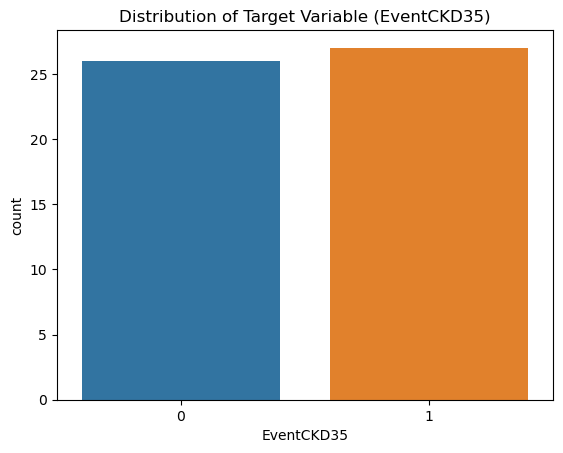

In [43]:
# Analyze the distribution of the target variable
target_distribution = processed_df_cluster_subgroup_FS['EventCKD35'].value_counts(normalize=True)
print("Distribution of the target variable (EventCKD35):")
print(target_distribution)

# Plot the distribution
sns.countplot(x='EventCKD35', data=processed_df_cluster_subgroup_FS)
plt.title('Distribution of Target Variable (EventCKD35)')
plt.show()

**Since the situation is almost half and half, there is no need to correct imbalance since there is balance in this subgroup**

#### 4. Model Training and Evaluation

##### ## The section for all information without feature selection

<li value="1"> <strong> Data Preparation </strong>  </li> 

In [44]:
# Data Preparation

# Separate features and target
X = processed_df_cluster_subgroup.drop(columns=['EventCKD35'])
y = processed_df_cluster_subgroup['EventCKD35']

# Separate to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42, 25) (11, 25) (42,) (11,)


<strong> We will train the following models:</strong> 
<li value="1"> Logistic Regression </li> 
<li value="1"> Decision Tree </li> 
<li value="1"> Random Forest </li>
<li value="1"> Support Vector Machine (SVM) </li> 

Because in our research they also tested XGBOOST, we tested it only for this part, and because it does not produce different and better results, we do not continue with it

In [45]:
# Model Training

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb

# Initialize the models
log_reg = LogisticRegression(random_state=42)
dec_tree = DecisionTreeClassifier(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42, probability=True)
xgb_model = xgb.XGBClassifier(random_state=42)

# List of models
models = [log_reg, dec_tree, rand_forest, svm, xgb_model]

# Train and evaluate the models
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Evaluation metrics for {model.__class__.__name__}:")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.2f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.2f}")
    print("-----")

Evaluation metrics for LogisticRegression:
Precision: 0.67
Recall: 0.50
F1-score: 0.57
ROC-AUC: 0.68
-----
Evaluation metrics for DecisionTreeClassifier:
Precision: 0.60
Recall: 0.75
F1-score: 0.67
ROC-AUC: 0.73
-----
Evaluation metrics for RandomForestClassifier:
Precision: 0.80
Recall: 1.00
F1-score: 0.89
ROC-AUC: 0.93
-----
Evaluation metrics for SVC:
Precision: 0.75
Recall: 0.75
F1-score: 0.75
ROC-AUC: 0.80
-----
Evaluation metrics for XGBClassifier:
Precision: 0.50
Recall: 0.50
F1-score: 0.50
ROC-AUC: 0.61
-----


<li value="1"> <strong> Cross-Validation and Hyperparameter Tuning: </strong> we will use GridSearchCV for hyperparameter tuning and cross-validation. </li> 

In [46]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grids = {
    'log_reg': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'dec_tree': {
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10]
    },
    'rand_forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15]
    },
    'svm': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}

# Models with parameter grids
model_param_grid = {
    'log_reg': (log_reg, param_grids['log_reg']),
    'dec_tree': (dec_tree, param_grids['dec_tree']),
    'rand_forest': (rand_forest, param_grids['rand_forest']),
    'svm': (svm, param_grids['svm'])
}

# Perform GridSearchCV for each model
best_models = {}
for model_name, (model, param_grid) in model_param_grid.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Best parameters for log_reg: {'C': 0.1, 'solver': 'lbfgs'}
Best parameters for dec_tree: {'max_depth': 10, 'min_samples_split': 10}
Best parameters for rand_forest: {'max_depth': 5, 'n_estimators': 100}
Best parameters for svm: {'C': 0.1, 'kernel': 'rbf'}


<li value="1"> <strong> Evaluation and Comparison: </strong> evaluate the tuned models on the test set and plot the ROC and Precision-Recall curves. </li> 




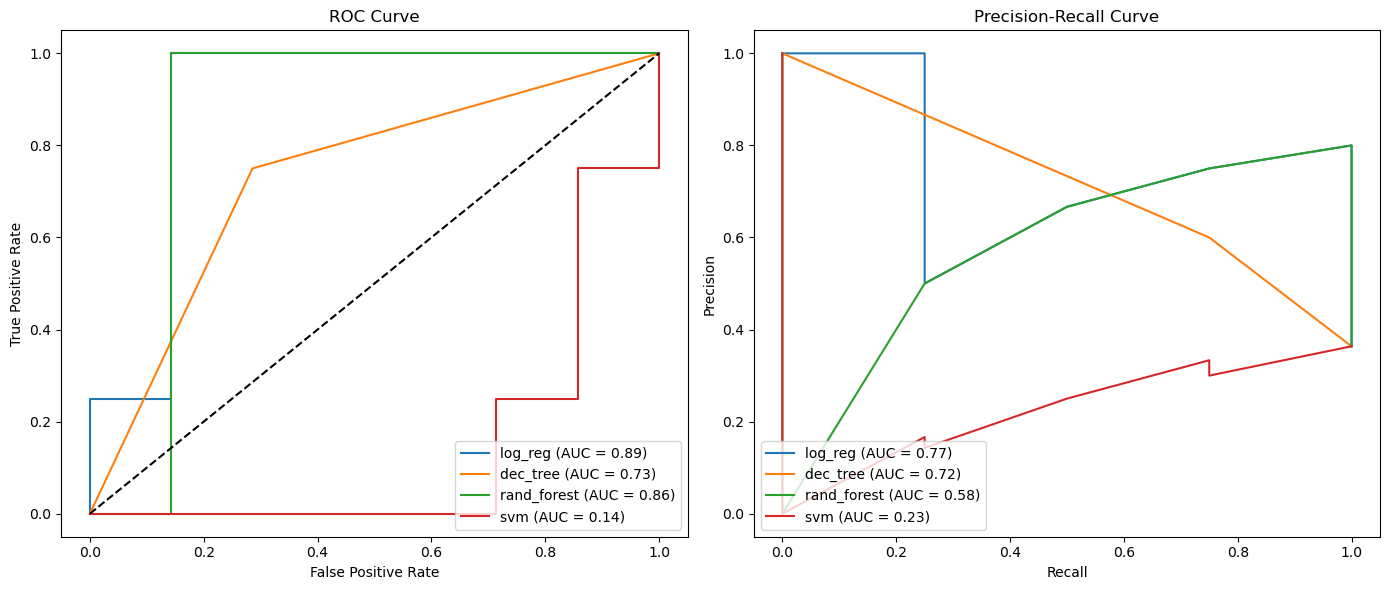

In [47]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score, f1_score, precision_score, recall_score

# Function to plot ROC and Precision-Recall curves
def plot_roc_pr_curves(models, X_test, y_test):
    plt.figure(figsize=(14, 6))

    # Plot ROC Curve
    plt.subplot(1, 2, 1)
    for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

    # Plot Precision-Recall Curve
    plt.subplot(1, 2, 2)
    for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{name} (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')

    plt.tight_layout()
    plt.show()

# Plot ROC and Precision-Recall curves
plot_roc_pr_curves(best_models, X_test, y_test)

##### ## The section for the information in which feature selection was performed

<li value="1"> <strong> Data Preparation </strong>  </li> 

In [48]:
# Data Preparation

# Separate features and target
X = processed_df_cluster_subgroup_FS.drop(columns=['EventCKD35'])
y = processed_df_cluster_subgroup_FS['EventCKD35']

# Separate to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42, 15) (11, 15) (42,) (11,)


<strong> We will train the following models:</strong> 
<li value="1"> Logistic Regression </li> 
<li value="1"> Decision Tree </li> 
<li value="1"> Random Forest </li>
<li value="1"> Support Vector Machine (SVM) </li> 

In [49]:
# Model Training

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Initialize the models
log_reg = LogisticRegression(random_state=42)
dec_tree = DecisionTreeClassifier(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42, probability=True)

# List of models
models = [log_reg, dec_tree, rand_forest, svm]

# Train and evaluate the models
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Evaluation metrics for {model.__class__.__name__}:")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.2f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.2f}")
    print("-----")

Evaluation metrics for LogisticRegression:
Precision: 0.75
Recall: 0.75
F1-score: 0.75
ROC-AUC: 0.80
-----
Evaluation metrics for DecisionTreeClassifier:
Precision: 0.50
Recall: 0.75
F1-score: 0.60
ROC-AUC: 0.66
-----
Evaluation metrics for RandomForestClassifier:
Precision: 0.80
Recall: 1.00
F1-score: 0.89
ROC-AUC: 0.93
-----
Evaluation metrics for SVC:
Precision: 0.75
Recall: 0.75
F1-score: 0.75
ROC-AUC: 0.80
-----


<li value="1"> <strong> Cross-Validation and Hyperparameter Tuning: </strong> we will use GridSearchCV for hyperparameter tuning and cross-validation. </li> 

In [50]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grids = {
    'log_reg': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'dec_tree': {
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10]
    },
    'rand_forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15]
    },
    'svm': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}

# Models with parameter grids
model_param_grid = {
    'log_reg': (log_reg, param_grids['log_reg']),
    'dec_tree': (dec_tree, param_grids['dec_tree']),
    'rand_forest': (rand_forest, param_grids['rand_forest']),
    'svm': (svm, param_grids['svm'])
}

# Perform GridSearchCV for each model
best_models = {}
for model_name, (model, param_grid) in model_param_grid.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Best parameters for log_reg: {'C': 10, 'solver': 'lbfgs'}
Best parameters for dec_tree: {'max_depth': 5, 'min_samples_split': 2}
Best parameters for rand_forest: {'max_depth': 5, 'n_estimators': 300}
Best parameters for svm: {'C': 0.1, 'kernel': 'linear'}


<li value="1"> <strong> Evaluation and Comparison: </strong> evaluate the tuned models on the test set and plot the ROC and Precision-Recall curves. </li> 




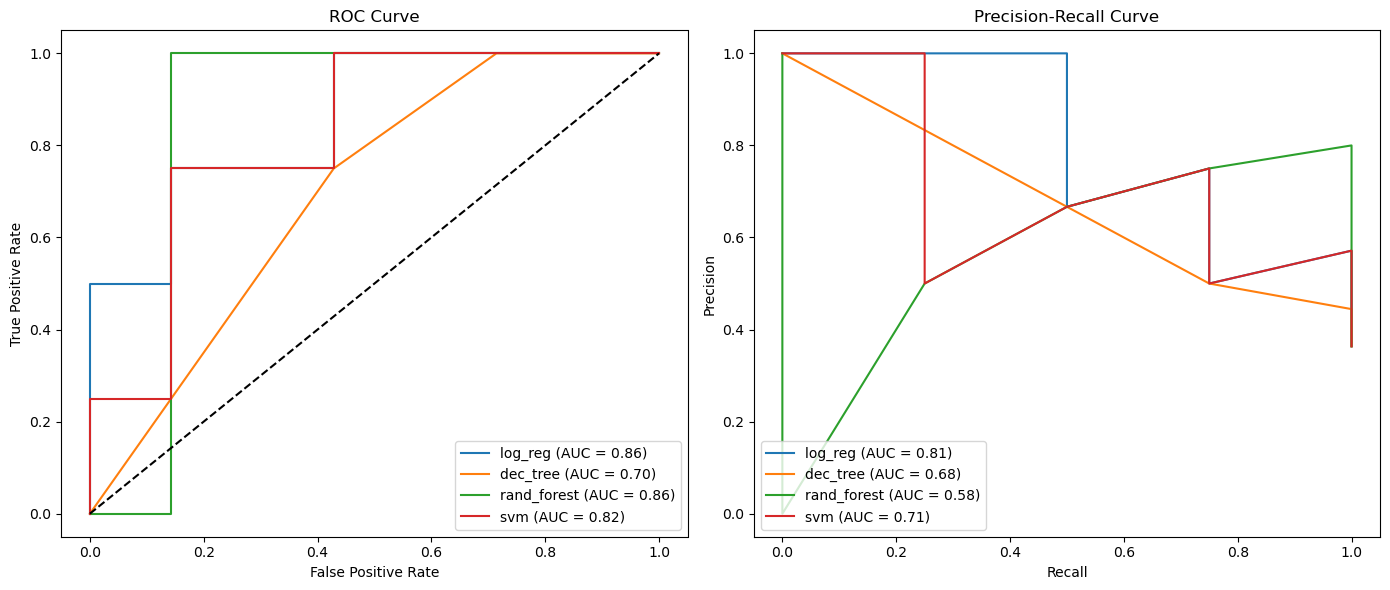

In [51]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score, f1_score, precision_score, recall_score

# Function to plot ROC and Precision-Recall curves
def plot_roc_pr_curves(models, X_test, y_test):
    plt.figure(figsize=(14, 6))

    # Plot ROC Curve
    plt.subplot(1, 2, 1)
    for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

    # Plot Precision-Recall Curve
    plt.subplot(1, 2, 2)
    for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{name} (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')

    plt.tight_layout()
    plt.show()

# Plot ROC and Precision-Recall curves
plot_roc_pr_curves(best_models, X_test, y_test)

##### Choosing the Best Model 

<div align="justify">
<strong> Performance Measures: </strong> <br>
<li value="1"> <strong>  Precision: </strong> Important when the cost of false positives is high.</li>
<li value="1"> <strong>  Recall: </strong> Important when the cost of false negatives is high.</li>
<li value="1"> <strong>  F1-Score: </strong> Harmonic mean of precision and recall, useful when classes are unbalanced.</li>
<li value="1"> <strong>  ROC-AUC: </strong> Represents the model's ability to distinguish between classes.</li>
<li value="1"> <strong>  Precision-Recall AUC: </strong> More informative when dealing with unbalanced datasets.</li>
<br>
<strong> Considerations:</strong> <br>
If the cost of missing CKD is higher (false negatives), recall is crucial.<br>
If the cost of incorrectly predicting CKD is higher (false positives), precision is important.<br>
ROC-AUC and Precision-Recall AUC provide overall model performance.<br>
Based on the above considerations and the plotted curves, <strong> we will choose the Logistic Regression Classifier. </strong> <br> 
<br>     
<strong> Comparison of the information with feature selection and without feature selection: </strong> <br>    
Unlike last time, when we perform the model to the sub-group, it seems that <strong> there is an improvement when we run the model that has undergone feature selection, </strong> so from now on we will continue with the information that has undergone feature selection   
    
</div>

#### 5. Explanatory AI

<li value="1"> Applying <strong> SHAP: </strong> is a unified approach to explain the output of any machine learning model. It connects game theory with local explanations.</li>

<strong> Explaining a single prediction from the test set: </strong>

In [52]:
import shap
import numpy as np

# Separate features and target
X = processed_df_cluster_subgroup_FS.drop(columns=['EventCKD35'])
y = processed_df_cluster_subgroup_FS['EventCKD35']

# Separate to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

shap.initjs()

# Train the logistic regression model
model = LogisticRegression(C=10, solver='lbfgs', random_state=42)
best_model = model.fit(X_train, y_train)

# Reduce the background samples using shap.sample (Adjust the number of samples as needed)
background_sample = shap.sample(X_train, 10)  # My calculation power is not great, so the amount is small

ex = shap.KernelExplainer(best_model.predict, background_sample)
shap_values = ex.shap_values(X_test.iloc[0,:])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0,:])

It seems that for this observation in the subgroup the features that have the most influence are the age group that tries to move the prediction of the observation from zero (not sick), while historyCHD tries the most to preserve the prediction of the observation at zero.

<strong> Summary: </strong>

  0%|          | 0/11 [00:00<?, ?it/s]

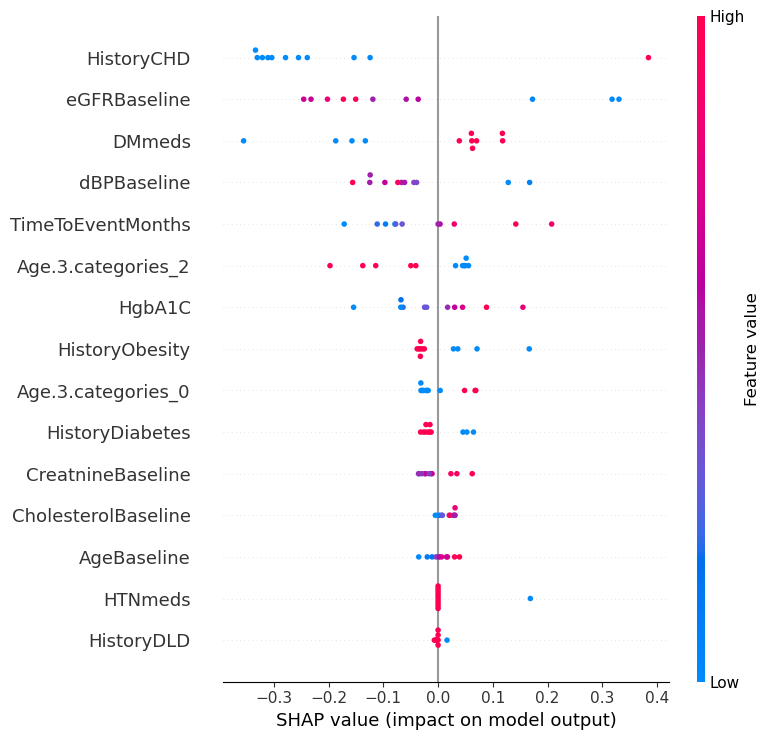

In [53]:
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

The SHAP analysis summary plot for the subgroup reveals several key features that significantly impact the model's predictions. Notably, HistoryCHD, eGFRBaseline, DMmeds, Age.3.categories_2, and TimeToEventMonths are influential in predicting CKD within this subgroup.

**Conclusions**:

From a medical perspective, a history of CHD emerges as the most significant predictor for CKD, although this observation is based on limited data. A low eGFR baseline, as expected, indicates poor kidney function, reinforcing its importance. Interestingly, the intake of DM medications is associated with an increased likelihood of CKD, which contrasts with general expectations.

Additionally, features such as TimeToEventMonths, Age categories, and diastolic blood pressure also have a considerable impact on the model's predictions, though their influence varies compared to previous analyses. These insights highlight the nuanced and subgroup-specific factors that machine learning models can uncover, offering valuable guidance for clinical decision-making.